# Q1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import statsmodels.api as sm

## Part (a)

In [2]:
def f(x):
    return 0.5 * np.exp(-np.abs(x))

def random_walk_metropolis_a(x0, N, s):
    samples = [x0]
    for i in range(N):
        x_prev = samples[-1]
        x_curr = np.random.normal(x_prev, s)
        ratio = f(x_curr) / f(x_prev)
        u = np.random.uniform()
        if np.log(u) < np.log(ratio):
            samples.append(x_curr)
        else:
            samples.append(x_prev)
    return samples

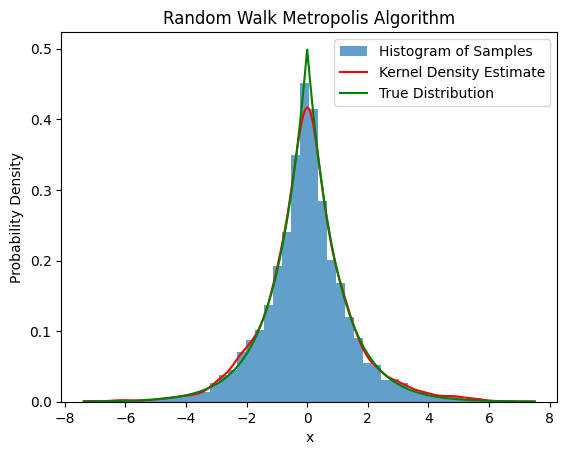

Sample Mean: 0.006552477595313629
Sample Standard Deviation: 1.4711495702376514


In [3]:
np.random.seed(0)

x0 = 0
N = 10000
s = 1

samples = random_walk_metropolis_a(x0, N, s)

plt.hist(samples, bins=50, density=True, alpha=0.7, label='Histogram of Samples')
kde = gaussian_kde(samples)
x_vals = np.linspace(min(samples), max(samples), 1000)
plt.plot(x_vals, kde(x_vals), 'r', label='Kernel Density Estimate')

true_dist = np.linspace(min(samples), max(samples), 1000)
plt.plot(true_dist, f(true_dist), 'g', label='True Distribution')

plt.legend()
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Random Walk Metropolis Algorithm')
plt.show()

sample_mean = np.mean(samples)
sample_std = np.std(samples)
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

## Part (b)

In [4]:
def random_walk_metropolis_b(N, s, J):
    chains, Mj, Vj = {} , {}, {}
    x0_lst = np.random.normal(0, 1, J)
    for x0 in x0_lst:
        samples = random_walk_metropolis_a(x0, N, s)
        chains[x0] = samples
        Mj[x0] = np.mean(samples)
        Vj[x0] = np.var(samples)
    W = np.mean(list(Vj.values()))
    M = np.mean(list(Mj.values()))
    B = np.var(list(Mj.values()))
    R = np.sqrt((B + W) / W)
    return R      

In [5]:
np.random.seed(0)
N = 2000
s = 0.001
J = 4
R = random_walk_metropolis_b(N, s, J)
print("Value of R when N = 2000, s = 0.01 and J = 4: " + str(R))

Value of R when N = 2000, s = 0.01 and J = 4: 42.42785147910109


In [6]:
np.random.seed(0)
s_lst = np.linspace(0.001, 1, 1000)
R_lst = []
for s in s_lst:
    R_lst.append(random_walk_metropolis_b(N, s, J))

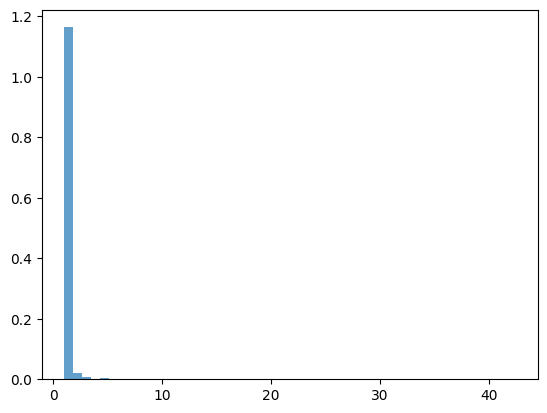

In [7]:
plt.hist(R_lst, bins=50, density=True, alpha=0.7, label='Histogram of Samples')
plt.show()

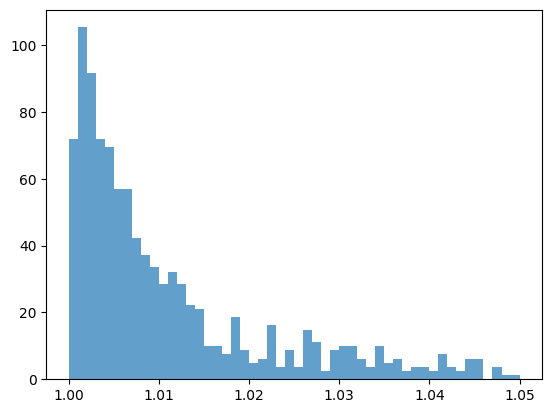

In [8]:
plt.hist(R_lst, bins=50, density=True, alpha=0.7, label='Histogram of Samples', range=(1, 1.05))
plt.show()

# Q2

## Part (a)

In [3]:
df1998 = pd.read_csv('dataverse_files/1998.csv.bz2', compression='bz2')

In [4]:
df1998.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### 1998 Data

Step by step process is done for the first year of data to clarify what the code does

In [5]:
# find the hour that the flight was scheduled to depart
df1998['CRSDepHour'] = df1998['CRSDepTime'] // 100
# a flight is considered to be delayed if any of the delay variables have a value of 1
df1998['isDelayed'] = (df1998['DepDelay'] > 0) | (df1998['ArrDelay'] > 0) | (df1998['CarrierDelay'] > 0) | (df1998['WeatherDelay'] > 0) | (df1998['NASDelay'] > 0) | (df1998['SecurityDelay'] > 0) | (df1998['LateAircraftDelay'] > 0)
df1998

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepHour,isDelayed
0,1998,1,17,6,715.0,715,840.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,False
1,1998,1,18,7,715.0,715,830.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,False
2,1998,1,19,1,715.0,715,831.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,False
3,1998,1,20,2,715.0,715,836.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,False
4,1998,1,21,3,715.0,715,836.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5384716,1998,12,27,7,1141.0,1145,1453.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,False
5384717,1998,12,28,1,1153.0,1145,1520.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True
5384718,1998,12,29,2,1154.0,1145,1507.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True
5384719,1998,12,30,3,1209.0,1145,1510.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True


In [6]:
# find the total number of flights that occurred for each hour
df1998_grouped_hour = df1998.groupby('CRSDepHour').size().reset_index(name='total count')
df1998_grouped_hour

,CRSDepHour,total count
0,0,108082
1,1,10783
2,2,3072
3,3,323
4,5,21383
5,6,318192
6,7,380051
7,8,371392
8,9,338689
9,10,318971


In [7]:
# find all delayed flights
df1998_delayed = df1998[df1998['isDelayed']]
df1998_delayed

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepHour,isDelayed
5,1998,1,22,4,725.0,715,847.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,True
11,1998,1,28,3,817.0,715,947.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,True
12,1998,1,29,4,715.0,715,843.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,True
13,1998,1,30,5,857.0,715,1015.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,True
14,1998,1,31,6,715.0,715,845.0,840,WN,76,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5384715,1998,12,26,6,1207.0,1145,1506.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True
5384717,1998,12,28,1,1153.0,1145,1520.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True
5384718,1998,12,29,2,1154.0,1145,1507.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True
5384719,1998,12,30,3,1209.0,1145,1510.0,1457,UA,450,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11,True


In [8]:
# find the number of delayed flights for each hour
df1998_delayed_grouped_hour = df1998_delayed.groupby('CRSDepHour').size().reset_index(name='delayed count')
df1998_delayed_grouped_hour

,CRSDepHour,delayed count
0,0,57181
1,1,5364
2,2,1376
3,3,187
4,5,9177
5,6,146798
6,7,184445
7,8,193768
8,9,179792
9,10,177333


In [9]:
# find the historical probability of a flight being delayed for each hour
delayed_prob_hour_1998 = pd.merge(df1998_grouped_hour, df1998_delayed_grouped_hour, on='CRSDepHour', how='left')
delayed_prob_hour_1998.fillna(0, inplace=True)
delayed_prob_hour_1998['delayed prob'] = delayed_prob_hour_1998['delayed count'] / delayed_prob_hour_1998['total count']
delayed_prob_hour_1998

,CRSDepHour,total count,delayed count,delayed prob
0,0,108082,57181,0.529052
1,1,10783,5364,0.497450
2,2,3072,1376,0.447917
3,3,323,187,0.578947
4,5,21383,9177,0.429173
5,6,318192,146798,0.461350
6,7,380051,184445,0.485316
7,8,371392,193768,0.521734
8,9,338689,179792,0.530847
9,10,318971,177333,0.555953


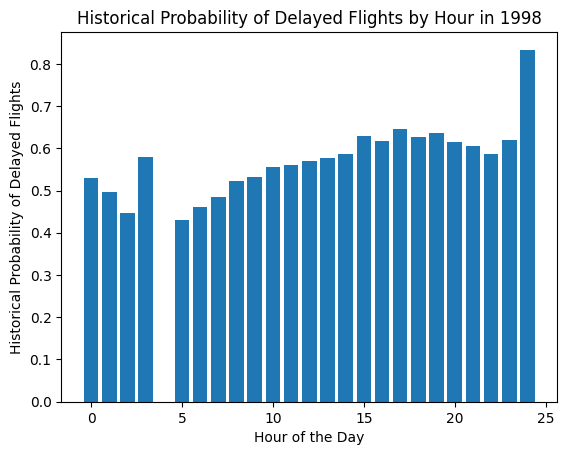

In [10]:
plt.bar(delayed_prob_hour_1998['CRSDepHour'], delayed_prob_hour_1998['delayed prob'])
plt.xlabel('Hour of the Day')
plt.ylabel('Historical Probability of Delayed Flights')
plt.title('Historical Probability of Delayed Flights by Hour in 1998')
plt.show()

In [11]:
# find the total number of flights that occurred for each day
df1998_grouped_day = df1998.groupby('DayOfWeek').size().reset_index(name='total count')
df1998_grouped_day

,DayOfWeek,total count
0,1,788003
1,2,789241
2,3,789076
3,4,796404
4,5,782299
5,6,694528
6,7,745170


In [12]:
# find the number of delayed flights for each day
df1998_delayed_grouped_day = df1998_delayed.groupby('DayOfWeek').size().reset_index(name='delayed count')
df1998_delayed_grouped_day

,DayOfWeek,delayed count
0,1,443177
1,2,432609
2,3,446298
3,4,486593
4,5,488189
5,6,357143
6,7,429879


In [13]:
# find the historical probability of a flight being delayed for each hour
delayed_prob_day_1998 = pd.merge(df1998_grouped_day, df1998_delayed_grouped_day, on='DayOfWeek', how='left')
delayed_prob_day_1998.fillna(0, inplace=True)
delayed_prob_day_1998['delayed prob'] = delayed_prob_day_1998['delayed count'] / delayed_prob_day_1998['total count']
delayed_prob_day_1998

,DayOfWeek,total count,delayed count,delayed prob
0,1,788003,443177,0.562405
1,2,789241,432609,0.548133
2,3,789076,446298,0.565596
3,4,796404,486593,0.610988
4,5,782299,488189,0.624044
5,6,694528,357143,0.514224
6,7,745170,429879,0.576887


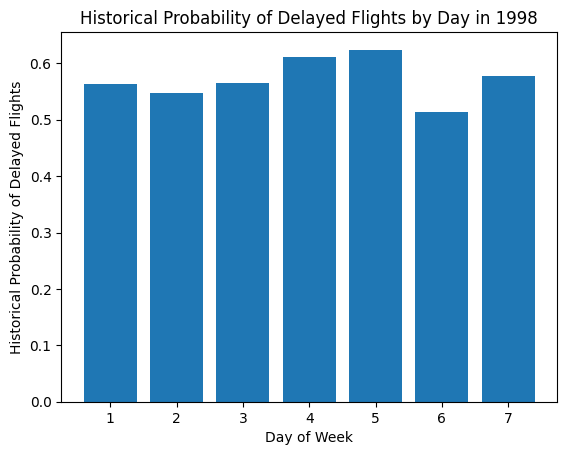

In [14]:
plt.bar(delayed_prob_day_1998['DayOfWeek'], delayed_prob_day_1998['delayed prob'])
plt.xlabel('Day of Week')
plt.ylabel('Historical Probability of Delayed Flights')
plt.title('Historical Probability of Delayed Flights by Day in 1998')
plt.show()

### 1999 Data

In [21]:
# function to prevent repetitive code and save memory
def find_delayed_probability_hour_day(year):
    path = 'dataverse_files/' + str(year) + '.csv.bz2'
    if year == 2001 or year == 2002:
        df = pd.read_csv(path, compression='bz2', encoding='latin-1')
    else:
        df = pd.read_csv(path, compression='bz2')

    # find the hour that the flight was scheduled to depart
    df['CRSDepHour'] = df['CRSDepTime'] // 100
    # a flight is considered to be delayed if any of the delay variables have a value of 1
    df['isDelayed'] = (df['DepDelay'] > 0) | (df['ArrDelay'] > 0) | (df['CarrierDelay'] > 0) | (df['WeatherDelay'] > 0) | (df['NASDelay'] > 0) | (df['SecurityDelay'] > 0) | (df['LateAircraftDelay'] > 0)

    # find the total number of flights that occurred for each hour
    df_grouped_hour = df.groupby('CRSDepHour').size().reset_index(name='total count')

    # find all delayed flights
    df_delayed = df[df['isDelayed']]

    # find the number of delayed flights for each hour
    df_delayed_grouped_hour = df_delayed.groupby('CRSDepHour').size().reset_index(name='delayed count')

    # find the historical probability of a flight being delayed for each hour
    delayed_prob_hour = pd.merge(df_grouped_hour, df_delayed_grouped_hour, on='CRSDepHour', how='left')
    delayed_prob_hour.fillna(0, inplace=True)
    delayed_prob_hour['delayed prob'] = delayed_prob_hour['delayed count'] / delayed_prob_hour['total count']
    print(delayed_prob_hour)

    plt.bar(delayed_prob_hour['CRSDepHour'], delayed_prob_hour['delayed prob'])
    plt.xlabel('Hour of the Day')
    plt.ylabel('Historical Probability of Delayed Flights')
    plt.title('Historical Probability of Delayed Flights by Hour in ' + str(year))
    plt.show()

    # find the total number of flights that occurred for each day
    df_grouped_day = df.groupby('DayOfWeek').size().reset_index(name='total count')

    # find the number of delayed flights for each day
    df_delayed_grouped_day = df_delayed.groupby('DayOfWeek').size().reset_index(name='delayed count')
    df_delayed_grouped_day

    # find the historical probability of a flight being delayed for each hour
    delayed_prob_day = pd.merge(df_grouped_day, df_delayed_grouped_day, on='DayOfWeek', how='left')
    delayed_prob_day.fillna(0, inplace=True)
    delayed_prob_day['delayed prob'] = delayed_prob_day['delayed count'] / delayed_prob_day['total count']
    print(delayed_prob_day)

    plt.bar(delayed_prob_day['DayOfWeek'], delayed_prob_day['delayed prob'])
    plt.xlabel('Day of Week')
    plt.ylabel('Historical Probability of Delayed Flights')
    plt.title('Historical Probability of Delayed Flights by Day in ' + str(year))
    plt.show()

    

    CRSDepHour  total count  delayed count  delayed prob
0            0       242811         132055      0.543859
1            1         9214           4550      0.493814
2            2         1493            742      0.496986
3            3          301            134      0.445183
4            5        24247           9237      0.380954
5            6       332752         140014      0.420776
6            7       378226         173730      0.459329
7            8       367264         183368      0.499281
8            9       334663         173937      0.519738
9           10       314992         173089      0.549503
10          11       325917         179723      0.551438
11          12       335901         193047      0.574714
12          13       344894         201656      0.584690
13          14       302696         179315      0.592393
14          15       333842         208834      0.625547
15          16       300904         185131      0.615249
16          17       371239    

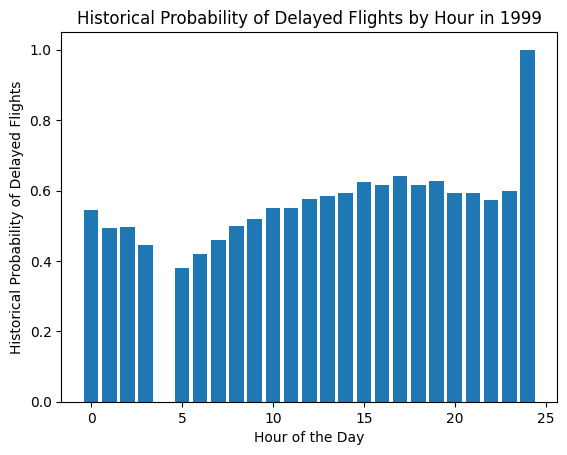

   DayOfWeek  total count  delayed count  delayed prob
0          1       810519         448073      0.552822
1          2       812478         426366      0.524772
2          3       812857         448619      0.551904
3          4       809243         480373      0.593608
4          5       817145         503696      0.616410
5          6       704006         361357      0.513287
6          7       761636         438804      0.576133


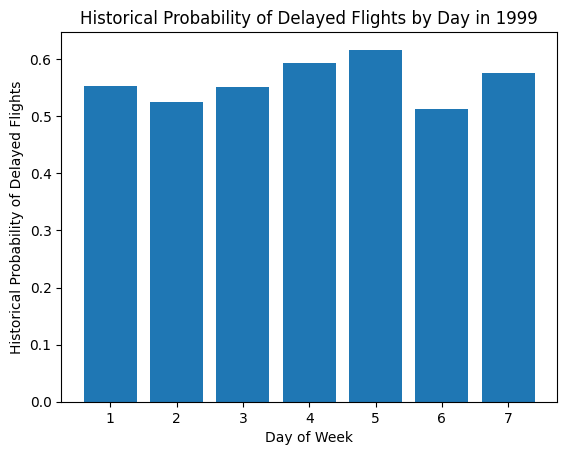

In [22]:
find_delayed_probability_hour_day(1999)

### 2000 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0        21815          12410      0.568875
1            1        10311           5360      0.519833
2            2         1182            547      0.462775
3            3          270             91      0.337037
4            4            1              1      1.000000
5            5        24515           9661      0.394085
6            6       365908         162194      0.443264
7            7       408250         194897      0.477396
8            8       391197         204389      0.522471
9            9       361142         193866      0.536814
10          10       334740         187587      0.560396
11          11       349788         203604      0.582078
12          12       351497         206656      0.587931
13          13       370022         218501      0.590508
14          14       321918         195967      0.608748
15          15       355330         227914      0.641415
16          16       318164    

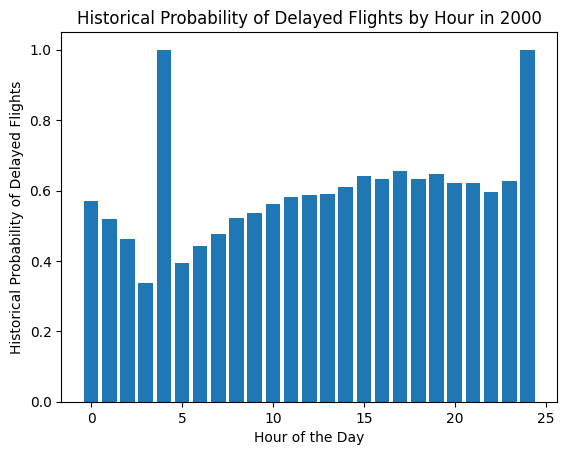

   DayOfWeek  total count  delayed count  delayed prob
0          1       825186         468850      0.568175
1          2       828523         440604      0.531795
2          3       830751         467201      0.562384
3          4       827740         514976      0.622147
4          5       828944         533960      0.644145
5          6       741662         396667      0.534835
6          7       800241         479255      0.598888


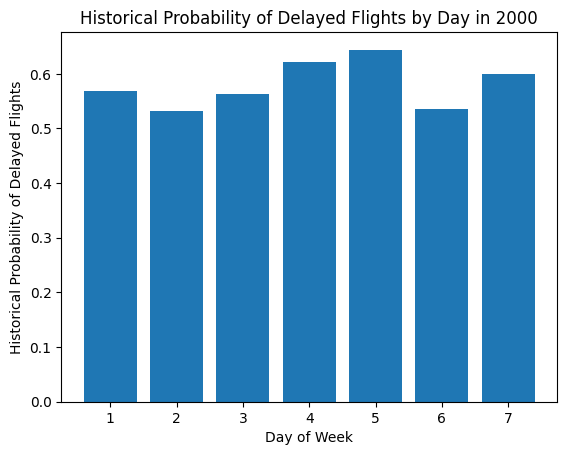

In [23]:
find_delayed_probability_hour_day(2000)

### 2001 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0        10440           5029      0.481705
1            1         8611           4020      0.466845
2            2          690            288      0.417391
3            3          156             19      0.121795
4            5        30803          12348      0.400870
5            6       394893         156944      0.397434
6            7       423576         180075      0.425130
7            8       412446         192369      0.466410
8            9       394080         185432      0.470544
9           10       333028         162326      0.487424
10          11       394691         202294      0.512538
11          12       366841         190531      0.519383
12          13       383166         200254      0.522630
13          14       359633         195018      0.542269
14          15       369976         208780      0.564307
15          16       347159         191979      0.553000
16          17       427562    

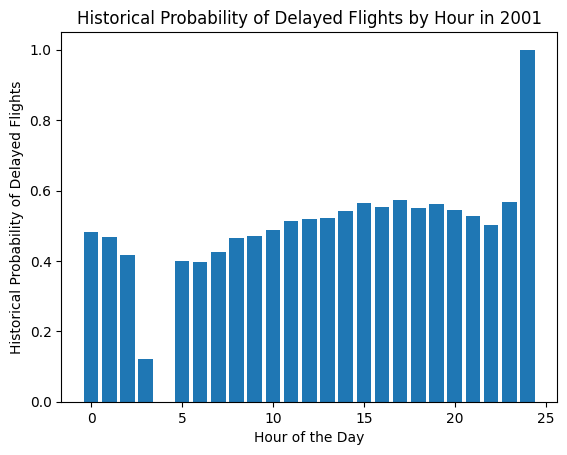

   DayOfWeek  total count  delayed count  delayed prob
0          1       881379         432060      0.490209
1          2       871342         404950      0.464743
2          3       871772         423456      0.485742
3          4       870683         475252      0.545838
4          5       871140         495068      0.568299
5          6       772781         379279      0.490798
6          7       828683         436122      0.526283


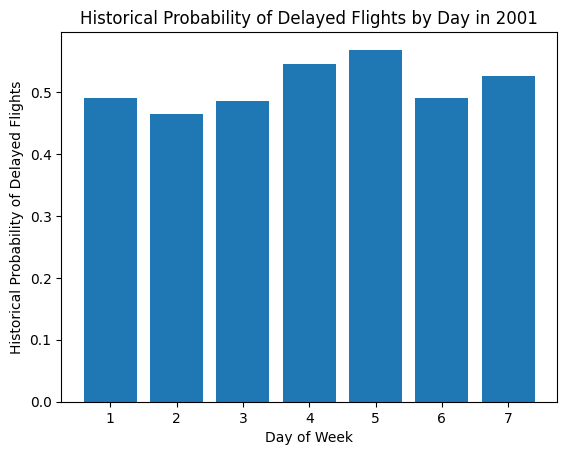

In [24]:
find_delayed_probability_hour_day(2001)

### 2002 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0         9369           3966      0.423311
1            1         5751           2331      0.405321
2            2          974            418      0.429158
3            5        23058           7756      0.336369
4            6       313582         108935      0.347389
5            7       373545         141824      0.379670
6            8       376624         159397      0.423226
7            9       355969         157194      0.441595
8           10       310390         138200      0.445246
9           11       347752         163457      0.470039
10          12       344476         161967      0.470184
11          13       347822         170038      0.488865
12          14       330007         168945      0.511944
13          15       332989         174665      0.524537
14          16       309075         162199      0.524788
15          17       393440         215907      0.548767
16          18       312513    

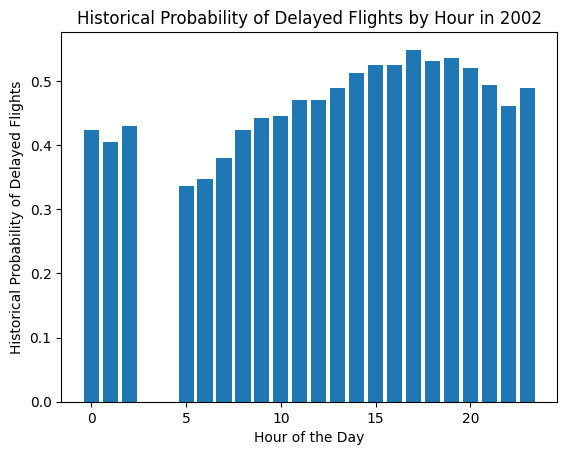

   DayOfWeek  total count  delayed count  delayed prob
0          1       774285         366736      0.473645
1          2       780556         343072      0.439523
2          3       769799         351491      0.456601
3          4       768973         384792      0.500397
4          5       771174         404635      0.524700
5          6       674222         294385      0.436629
6          7       732350         360831      0.492703


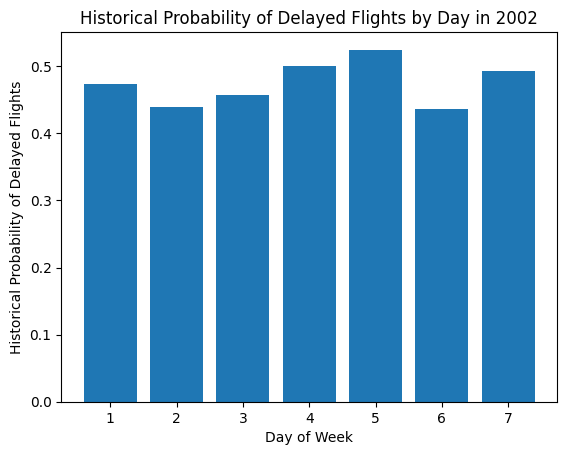

In [25]:
find_delayed_probability_hour_day(2002)

### 2003 Data

C:\Users\nasry\AppData\Local\Temp\ipykernel_30972\2258817143.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, compression='bz2')


    CRSDepHour  total count  delayed count  delayed prob
0            0         9200           3769      0.409674
1            1         5380           1890      0.351301
2            2         1151            481      0.417897
3            3            7              2      0.285714
4            4            3              1      0.333333
5            5        37580          12373      0.329244
6            6       371776         121956      0.328036
7            7       430273         155623      0.361684
8            8       453287         176482      0.389338
9            9       438624         179732      0.409763
10          10       404011         168585      0.417278
11          11       422201         185707      0.439854
12          12       424558         183402      0.431983
13          13       436968         198732      0.454798
14          14       405791         194152      0.478453
15          15       427099         209386      0.490252
16          16       385629    

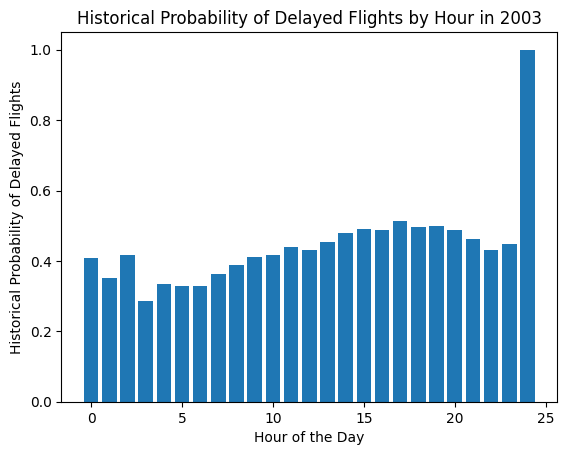

   DayOfWeek  total count  delayed count  delayed prob
0          1       959114         422747      0.440768
1          2       947126         391274      0.413117
2          3       962100         418096      0.434566
3          4       952542         450315      0.472751
4          5       954701         462891      0.484854
5          6       811260         330696      0.407633
6          7       901697         407410      0.451826


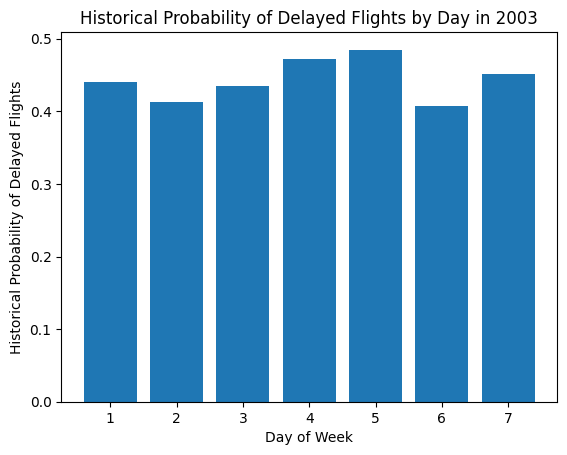

In [26]:
find_delayed_probability_hour_day(2003)

### 2004 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0         9765           4777      0.489196
1            1         5601           2514      0.448848
2            2          956            393      0.411088
3            3           68             31      0.455882
4            4           27              6      0.222222
5            5        55178          17744      0.321577
6            6       428128         152294      0.355721
7            7       460243         179392      0.389777
8            8       504792         218312      0.432479
9            9       486519         215531      0.443006
10          10       433407         200147      0.461799
11          11       469459         224507      0.478225
12          12       451703         217579      0.481686
13          13       476896         241747      0.506918
14          14       429426         227540      0.529870
15          15       466841         254741      0.545670
16          16       426556    

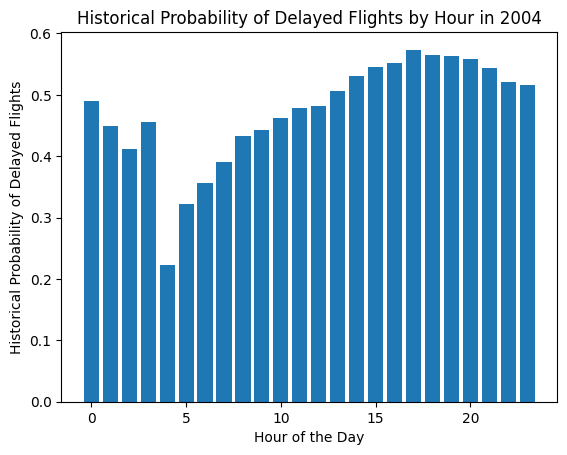

   DayOfWeek  total count  delayed count  delayed prob
0          1      1044508         527890      0.505396
1          2      1033863         484230      0.468370
2          3      1036521         501489      0.483819
3          4      1060245         548206      0.517056
4          5      1061447         565965      0.533201
5          6       903807         408657      0.452151
6          7       988879         489813      0.495321


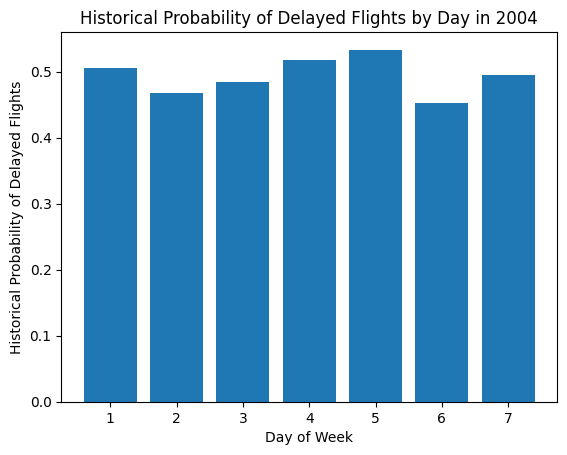

In [27]:
find_delayed_probability_hour_day(2004)

### 2005 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0        10321           5339      0.517295
1            1         4813           2178      0.452524
2            2         1187            600      0.505476
3            3           94             67      0.712766
4            4           90             68      0.755556
5            5        60384          18546      0.307134
6            6       448817         162016      0.360985
7            7       481285         189032      0.392765
8            8       486430         208169      0.427953
9            9       477184         214412      0.449328
10          10       444560         208448      0.468886
11          11       462803         223273      0.482436
12          12       455923         225505      0.494612
13          13       460820         237698      0.515815
14          14       429290         233122      0.543041
15          15       459737         256638      0.558228
16          16       443198    

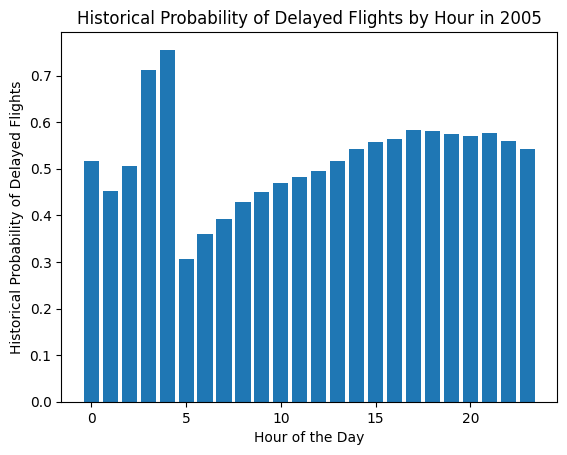

   DayOfWeek  total count  delayed count  delayed prob
0          1      1048968         530597      0.505828
1          2      1037289         487388      0.469867
2          3      1043208         513919      0.492633
3          4      1047749         567016      0.541175
4          5      1050985         579538      0.551424
5          6       919442         416912      0.453440
6          7       992955         499432      0.502975


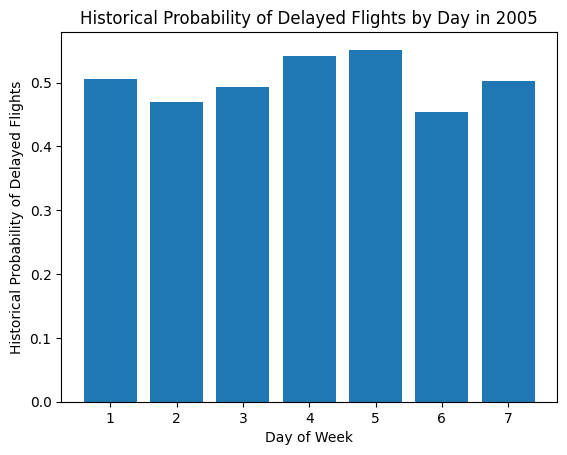

In [28]:
find_delayed_probability_hour_day(2005)

### 2006 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0         9372           4557      0.486236
1            1         4597           2216      0.482054
2            2         1027            441      0.429406
3            3          308            181      0.587662
4            4          520            218      0.419231
5            5        41894          14372      0.343056
6            6       478061         178944      0.374312
7            7       491565         204909      0.416850
8            8       501034         226494      0.452053
9            9       462172         224040      0.484755
10          10       454817         232666      0.511560
11          11       464356         241149      0.519319
12          12       453944         242247      0.533650
13          13       450325         253455      0.562827
14          14       456278         261742      0.573646
15          15       443075         262753      0.593021
16          16       447836    

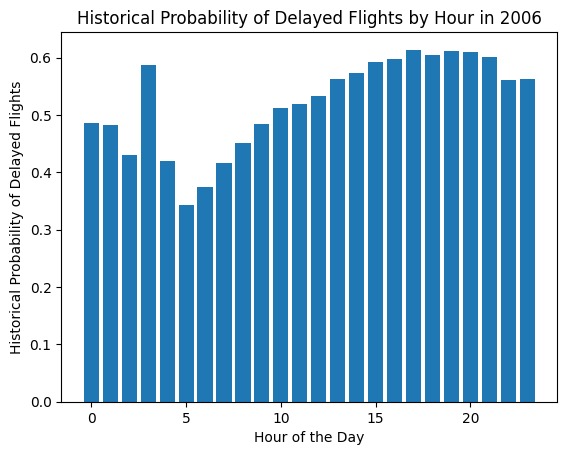

   DayOfWeek  total count  delayed count  delayed prob
0          1      1048054         560493      0.534794
1          2      1030322         508982      0.494003
2          3      1042952         538515      0.516337
3          4      1052949         593816      0.563955
4          5      1056606         618960      0.585800
5          6       899531         452688      0.503249
6          7      1011508         544337      0.538144


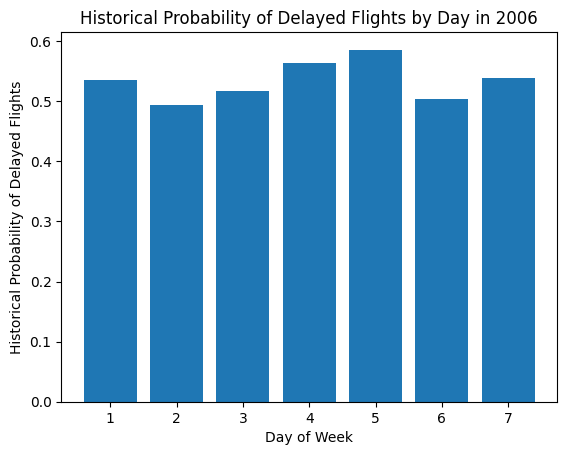

In [29]:
find_delayed_probability_hour_day(2006)

### 2007 Data

    CRSDepHour  total count  delayed count  delayed prob
0            0         9868           5093      0.516113
1            1         3572           1807      0.505879
2            2          861            445      0.516841
3            3          331            146      0.441088
4            4          815            368      0.451534
5            5        47090          17926      0.380675
6            6       523092         218684      0.418060
7            7       511861         228369      0.446154
8            8       510483         247655      0.485139
9            9       486368         247342      0.508549
10          10       467421         248010      0.530592
11          11       493960         266343      0.539200
12          12       461209         256803      0.556804
13          13       485993         283747      0.583850
14          14       459263         274546      0.597797
15          15       451493         277848      0.615398
16          16       482172    

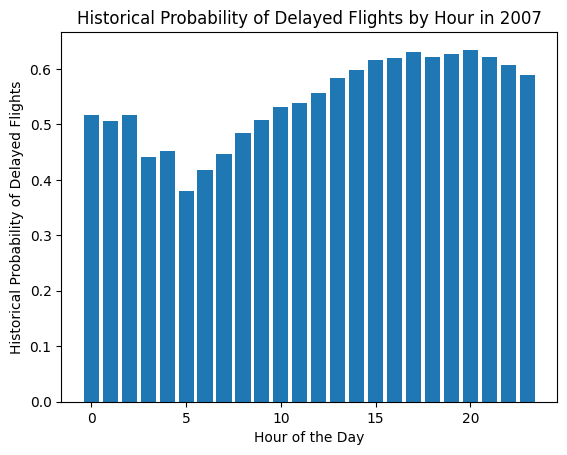

   DayOfWeek  total count  delayed count  delayed prob
0          1      1112474         630534      0.566785
1          2      1078562         561488      0.520589
2          3      1088858         590964      0.542737
3          4      1097738         640007      0.583023
4          5      1101689         664351      0.603030
5          6       933338         485349      0.520014
6          7      1040556         587864      0.564952


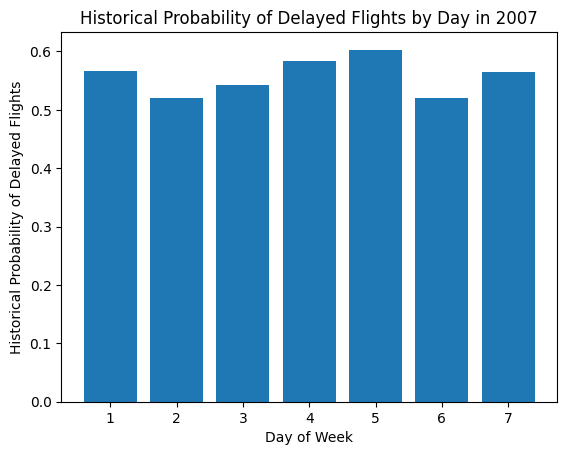

In [30]:
find_delayed_probability_hour_day(2007)

## Part (b)

### 1998 Data

Step by step process is done for the first year of data to clarify what the code does

In [15]:
plane_data = pd.read_csv('dataverse_files/plane-data.csv')
plane_data

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0


In [16]:
plane_data.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [17]:
# retrieve tail number and date of issue
tailnum_year = plane_data[['tailnum', 'issue_date']]
tailnum_year['issue_date'] = pd.to_datetime(tailnum_year['issue_date'])
tailnum_year = tailnum_year.rename(columns={'tailnum': 'TailNum'})
tailnum_year.dropna(inplace=True)
tailnum_year

C:\Users\nasry\AppData\Local\Temp\ipykernel_26316\185560862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tailnum_year['issue_date'] = pd.to_datetime(tailnum_year['issue_date'])


,TailNum,issue_date
34,N10156,2004-02-13
35,N102UW,1999-05-26
36,N10323,1997-07-01
37,N103US,1999-06-18
38,N104UA,1998-01-26
...,...,...
5024,N997DL,1992-03-11
5025,N998AT,2003-01-23
5026,N998DL,1992-04-02
5027,N999CA,2008-07-09


In [30]:
# Group by tailnum to find total flights for each tailnum
df1998_grouped_tailnum = df1998.groupby('TailNum').size().reset_index(name='total_count')
# Group by tailnum to find delayed flights for each tailnum
df1998_delayed_grouped_tailnum = df1998_delayed.groupby('TailNum').size().reset_index(name='delay_count')
# Merge both dataframes together
df1998_grouped_tailnum_merged = pd.merge(df1998_grouped_tailnum, df1998_delayed_grouped_tailnum, how='inner', on='TailNum')
# Merge with tailnum year
df1998_grouped_tailnum_merged = pd.merge(df1998_grouped_tailnum_merged, tailnum_year, how='inner', on='TailNum')
# Create delayed_prob and age columns
df1998_grouped_tailnum_merged['delayed_prob'] = df1998_grouped_tailnum_merged['delay_count'] / df1998_grouped_tailnum_merged['total_count']
df1998_grouped_tailnum_merged['Age'] = 1998 - df1998_grouped_tailnum_merged['issue_date'].dt.year
# Filter out negative ages and tailnums that have lesser than 100 flights
df1998_grouped_tailnum_merged = df1998_grouped_tailnum_merged[(df1998_grouped_tailnum_merged['Age'] >= 0) & (df1998_grouped_tailnum_merged['total_count'] >= 100)]
df1998_grouped_tailnum_merged

,TailNum,total_count,delay_count,issue_date,delayed_prob,Age
0,N10323,1116,680,1997-07-01,0.609319,1
4,N11641,1475,798,1997-08-29,0.541017,1
6,N1200K,149,96,1998-04-13,0.644295,0
7,N1201P,145,89,1998-04-22,0.613793,0
8,N12109,1001,670,1994-12-07,0.669331,4
...,...,...,...,...,...,...
1426,N995DL,2127,1266,1992-03-06,0.595205,6
1427,N996DL,2091,1237,1992-02-27,0.591583,6
1428,N997DL,2028,1225,1992-03-11,0.604043,6
1429,N998DL,2053,1253,1992-04-02,0.610326,6


In [27]:
# run linear regression
X = df1998_grouped_tailnum_merged['Age']
X = sm.add_constant(X)
y = df1998_grouped_tailnum_merged['delayed_prob']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           delayed_prob   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     20.68
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           6.12e-06
Time:                        22:50:00   Log-Likelihood:                 1083.4
No. Observations:                 966   AIC:                            -2163.
Df Residuals:                     964   BIC:                            -2153.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6306      0.004    144.967      0.000       0.622       0.639
Age           -0.0028      0.001     -4.547      0.000      -0.004      -0.002
==============================================================================
Omnibus:                       22.777   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.852
Skew:                           0.134   Prob(JB):                     0.000982
Kurtosis:                       2.478   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

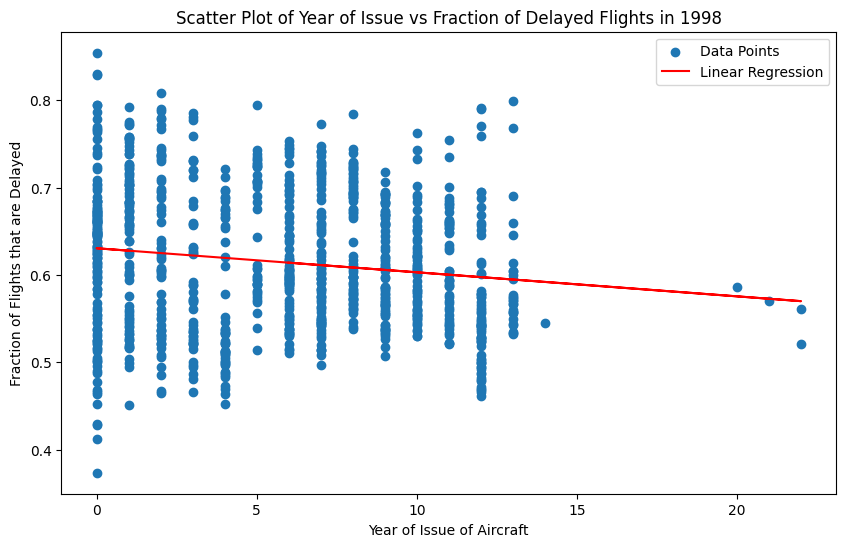

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df1998_grouped_tailnum_merged['Age'], df1998_grouped_tailnum_merged['delayed_prob'], label='Tail Numbers')
plt.plot(df1998_grouped_tailnum_merged['Age'], model.predict(X), color='red', label='Linear Regression')

plt.title('Scatter Plot of Age of Aircraft vs Fraction of Delayed Flights in 1998')
plt.xlabel('Age of Aircraft')
plt.ylabel('Fraction of Flights that are Delayed')
plt.legend()
plt.show()

### 1999 Data

In [31]:
# function to prevent repetitive code and to save memory
def find_delayed_probability_year(tailnum_year, year):
    path = 'dataverse_files/' + str(year) + '.csv.bz2'
    if year == 2001 or year == 2002:
        df = pd.read_csv(path, compression='bz2', encoding='latin-1')
    else:
        df = pd.read_csv(path, compression='bz2')

    # a flight is considered to be delayed if any of the delay variables have a value of 1
    df['isDelayed'] = (df['DepDelay'] > 0) | (df['ArrDelay'] > 0) | (df['CarrierDelay'] > 0) | (df['WeatherDelay'] > 0) | (df['NASDelay'] > 0) | (df['SecurityDelay'] > 0) | (df['LateAircraftDelay'] > 0)
    df_delayed = df[df['isDelayed']]
    
    # Group by tailnum to find total flights for each tailnum
    df_grouped_tailnum = df.groupby('TailNum').size().reset_index(name='total_count')
    # Group by tailnum to find delayed flights for each tailnum
    df_delayed_grouped_tailnum = df_delayed.groupby('TailNum').size().reset_index(name='delay_count')
    # Merge both dataframes together
    df_grouped_tailnum_merged = pd.merge(df_grouped_tailnum, df_delayed_grouped_tailnum, how='inner', on='TailNum')
    # Merge with tailnum year
    df_grouped_tailnum_merged = pd.merge(df_grouped_tailnum_merged, tailnum_year, how='inner', on='TailNum')
    # Create delayed_prob and age columns
    df_grouped_tailnum_merged['delayed_prob'] = df_grouped_tailnum_merged['delay_count'] / df_grouped_tailnum_merged['total_count']
    df_grouped_tailnum_merged['Age'] = year - df_grouped_tailnum_merged['issue_date'].dt.year
    # Filter out negative ages and tailnums that have lesser than 100 flights
    df_grouped_tailnum_merged = df_grouped_tailnum_merged[(df_grouped_tailnum_merged['Age'] >= 0) & (df_grouped_tailnum_merged['total_count'] >= 100)]

    # run linear regression
    X = df_grouped_tailnum_merged['Age']
    X = sm.add_constant(X)
    y = df_grouped_tailnum_merged['delayed_prob']
    model = sm.OLS(y, X).fit()
    print(model.summary())

    plt.figure(figsize=(10, 6))
    plt.scatter(df_grouped_tailnum_merged['Age'], df_grouped_tailnum_merged['delayed_prob'], label='Tail Numbers')
    plt.plot(df_grouped_tailnum_merged['Age'], model.predict(X), color='red', label='Linear Regression')

    plt.title('Scatter Plot of Age of Aircraft vs Fraction of Delayed Flights in ' + str(year))
    plt.xlabel('Age of Aircraft')
    plt.ylabel('Fraction of Flights that are Delayed')
    plt.legend()
    plt.show()
    

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.267
Date:                Tue, 26 Mar 2024   Prob (F-statistic):             0.0709
Time:                        22:59:47   Log-Likelihood:                 1232.3
No. Observations:                1143   AIC:                            -2461.
Df Residuals:                    1141   BIC:                            -2451.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6027      0.004    151.994      0.0

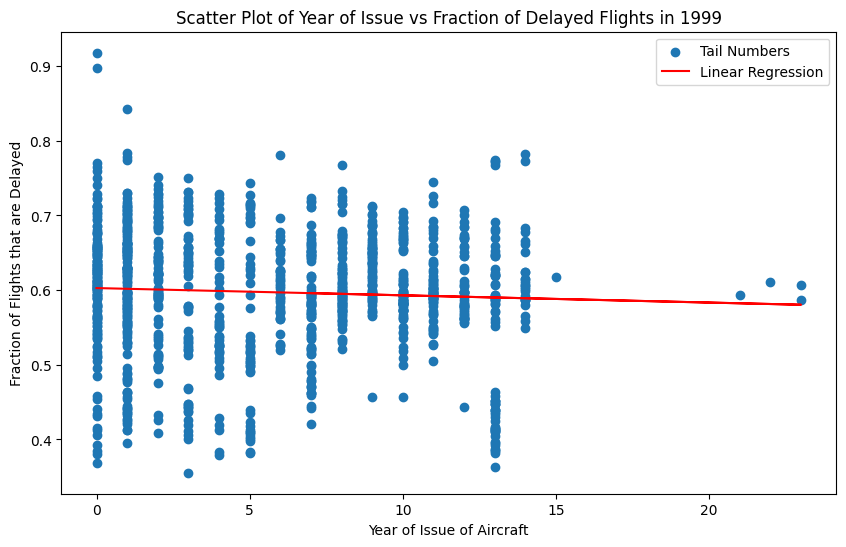

In [32]:
find_delayed_probability_year(tailnum_year, 1999)

### 2000 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8909
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.345
Time:                        23:02:32   Log-Likelihood:                 1178.2
No. Observations:                1282   AIC:                            -2352.
Df Residuals:                    1280   BIC:                            -2342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6194      0.004    141.899      0.0

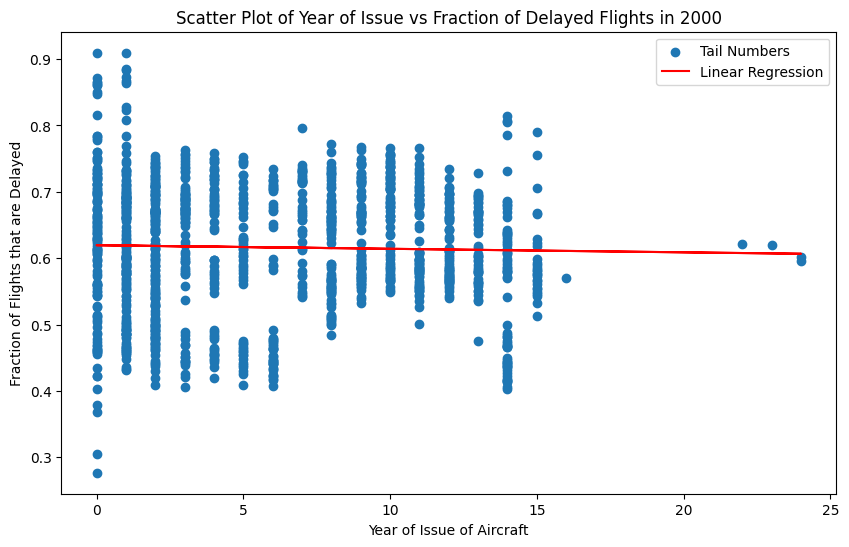

In [33]:
find_delayed_probability_year(tailnum_year, 2000)

### 2001 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     18.06
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.10e-05
Time:                        23:03:07   Log-Likelihood:                 250.19
No. Observations:                 235   AIC:                            -496.4
Df Residuals:                     233   BIC:                            -489.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5094      0.008     62.168      0.0

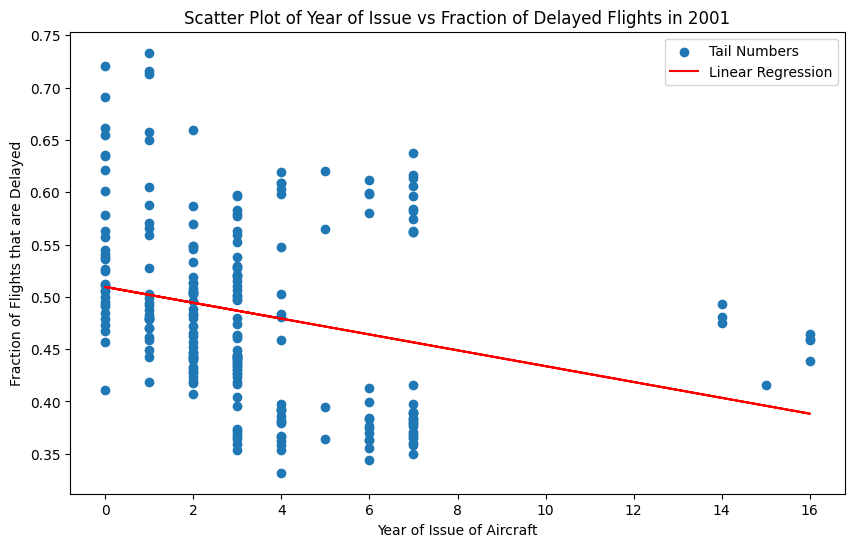

In [34]:
find_delayed_probability_year(tailnum_year, 2001)

### 2002 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.433
Date:                Tue, 26 Mar 2024   Prob (F-statistic):             0.0641
Time:                        23:03:35   Log-Likelihood:                 1349.5
No. Observations:                1538   AIC:                            -2695.
Df Residuals:                    1536   BIC:                            -2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5074      0.004    119.247      0.0

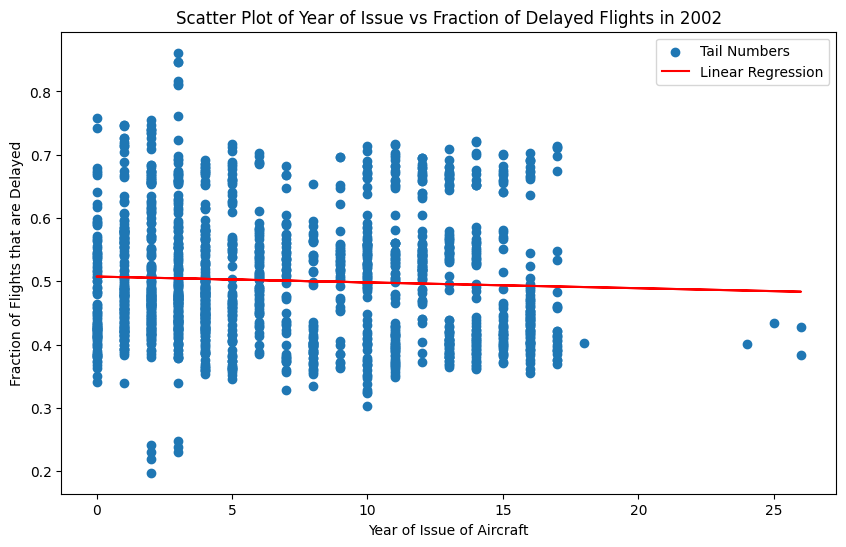

In [35]:
find_delayed_probability_year(tailnum_year, 2002)

### 2003 Data

C:\Users\nasry\AppData\Local\Temp\ipykernel_26316\1199050423.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, compression='bz2')


                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     11.38
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           0.000754
Time:                        23:04:11   Log-Likelihood:                 2491.2
No. Observations:                2177   AIC:                            -4978.
Df Residuals:                    2175   BIC:                            -4967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4730      0.003    185.779      0.0

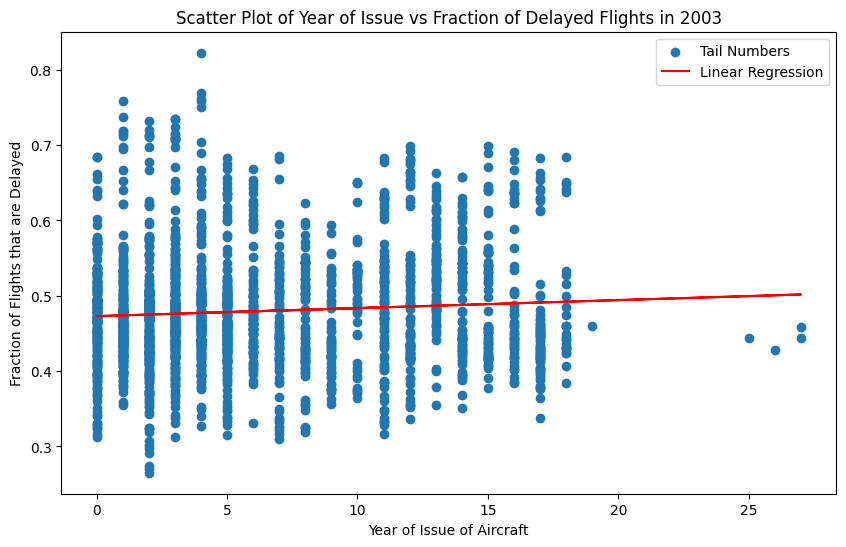

In [36]:
find_delayed_probability_year(tailnum_year, 2003)

### 2004 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     72.53
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.63e-17
Time:                        23:04:55   Log-Likelihood:                 3252.9
No. Observations:                2834   AIC:                            -6502.
Df Residuals:                    2832   BIC:                            -6490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5065      0.002    229.602      0.0

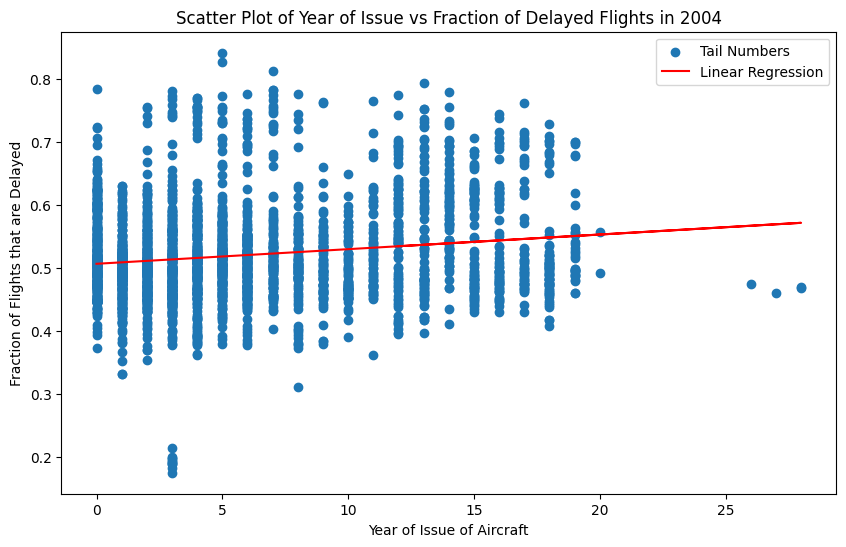

In [37]:
find_delayed_probability_year(tailnum_year, 2004)

### 2005 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.582
Date:                Tue, 26 Mar 2024   Prob (F-statistic):             0.0324
Time:                        23:05:47   Log-Likelihood:                 3975.7
No. Observations:                3135   AIC:                            -7947.
Df Residuals:                    3133   BIC:                            -7935.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5292      0.002    279.884      0.0

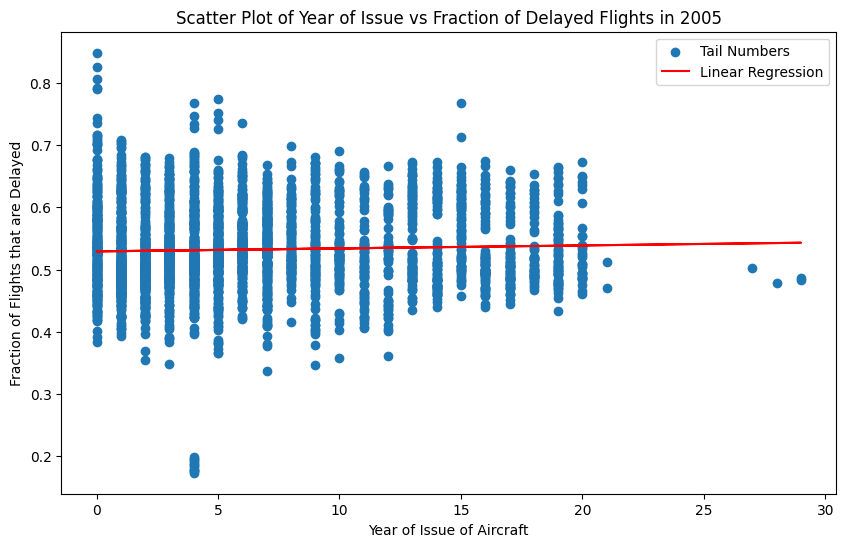

In [38]:
find_delayed_probability_year(tailnum_year, 2005)

### 2006 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.052
Date:                Tue, 26 Mar 2024   Prob (F-statistic):            0.00264
Time:                        23:06:52   Log-Likelihood:                 4691.6
No. Observations:                3441   AIC:                            -9379.
Df Residuals:                    3439   BIC:                            -9367.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5577      0.002    331.149      0.0

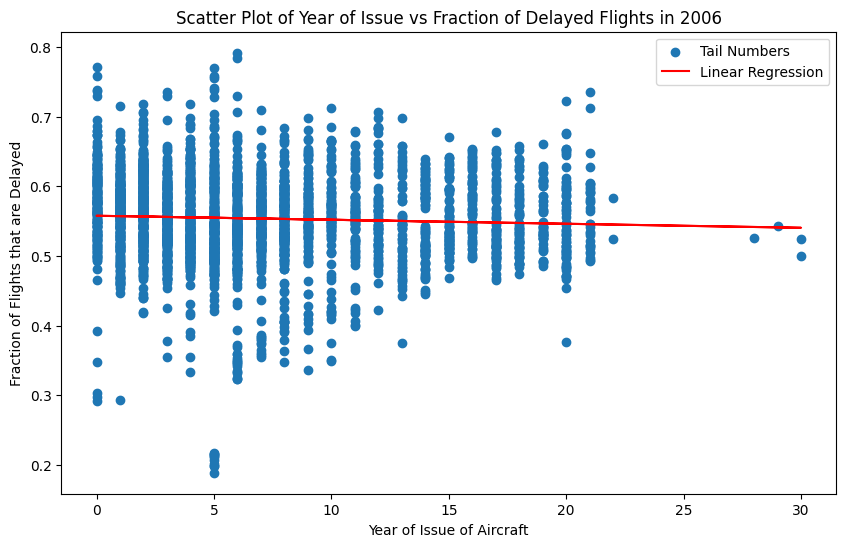

In [39]:
find_delayed_probability_year(tailnum_year, 2006)

### 2007 Data

                            OLS Regression Results                            
Dep. Variable:           delayed_prob   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.958
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.162
Time:                        23:07:55   Log-Likelihood:                 5045.4
No. Observations:                4171   AIC:                        -1.009e+04
Df Residuals:                    4169   BIC:                        -1.007e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5763      0.002    321.141      0.0

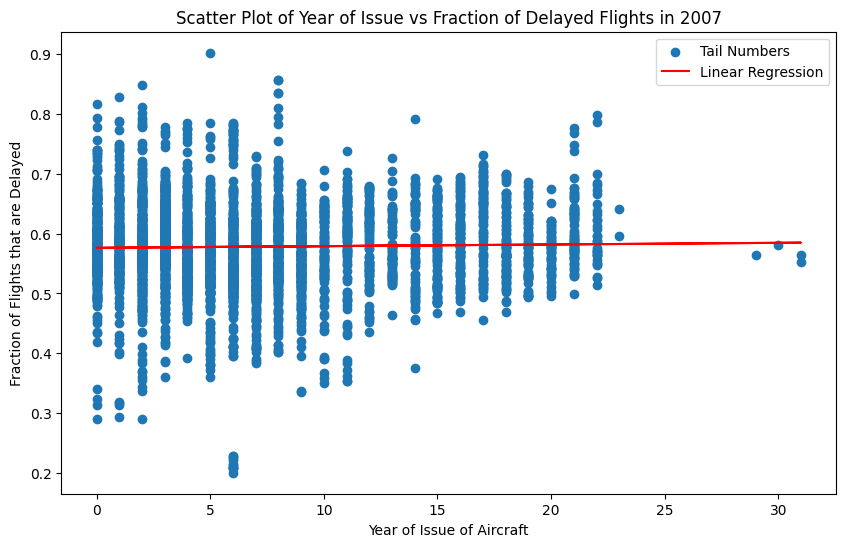

In [40]:
find_delayed_probability_year(tailnum_year, 2007)

## Part (c)

### 1998 Data

Step by step process is done for the first year of data to clarify what the code does

In [22]:
# get estimated hour of arrival
df1998['CRSArrHour'] = df1998['CRSArrTime'] // 100
# get week of the month
df1998['WeekofMonth'] = df1998['DayofMonth'] // 7

In [23]:
airports = pd.read_csv('dataverse_files/airports.csv')
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [24]:
airports_coord = airports[['iata', 'lat', 'long']]
airports_coord

,iata,lat,long
0,00M,31.953765,-89.234505
1,00R,30.685861,-95.017928
2,00V,38.945749,-104.569893
3,01G,42.741347,-78.052081
4,01J,30.688012,-81.905944
...,...,...,...
3371,ZEF,36.280024,-80.786069
3372,ZER,40.706449,-76.373147
3373,ZPH,28.228065,-82.155916
3374,ZUN,35.083227,-108.791777


In [25]:
# change boolean column to int column
# df1998['isDelayed'] = df1998['isDelayed'].astype(int)

# create dataframe with columns to be used for logistic regression
reg_cols = ['Month', 'WeekofMonth', 'DayOfWeek', 'CRSDepHour', 'CRSArrHour', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'Diverted']
df1998_reg = df1998[reg_cols]

# join to get lat and long for origin airport
airports_coord = airports_coord.rename(columns={'iata': 'Origin'})
df1998_reg = pd.merge(df1998_reg, airports_coord, on='Origin', how='left')
df1998_reg = df1998_reg.rename(columns={'lat': 'origin lat', 'long': 'origin long'})

# join to get lat and long for dest airport
airports_coord = airports_coord.rename(columns={'Origin': 'Dest'})
df1998_reg = pd.merge(df1998_reg, airports_coord, on='Dest', how='left')
df1998_reg = df1998_reg.rename(columns={'lat': 'dest lat', 'long': 'dest long'})

# drop Origin and Dest to prevent multicollinearity
df1998_reg = df1998_reg.drop(columns=['Origin', 'Dest'])

# restore airports_coord to original naming
airports_coord = airports_coord.rename(columns={'Dest': 'iata'})

df1998_reg

,Month,WeekofMonth,DayOfWeek,CRSDepHour,CRSArrHour,UniqueCarrier,Distance,Diverted,origin lat,origin long,dest lat,dest long
0,1,2,6,7,8,WN,872,0,30.194533,-97.669872,33.434167,-112.008056
1,1,2,7,7,8,WN,872,0,30.194533,-97.669872,33.434167,-112.008056
2,1,2,1,7,8,WN,872,0,30.194533,-97.669872,33.434167,-112.008056
3,1,2,2,7,8,WN,872,0,30.194533,-97.669872,33.434167,-112.008056
4,1,3,3,7,8,WN,872,0,30.194533,-97.669872,33.434167,-112.008056
...,...,...,...,...,...,...,...,...,...,...,...,...
5384716,12,3,7,11,14,UA,910,0,38.695422,-121.590767,39.858408,-104.667002
5384717,12,4,1,11,14,UA,910,0,38.695422,-121.590767,39.858408,-104.667002
5384718,12,4,2,11,14,UA,910,0,38.695422,-121.590767,39.858408,-104.667002
5384719,12,4,3,11,14,UA,910,0,38.695422,-121.590767,39.858408,-104.667002


In [26]:
predictor_columns = ['Month', 'WeekofMonth', 'DayOfWeek', 'CRSDepHour', 'CRSArrHour', 'UniqueCarrier', 'Distance', 'origin lat', 'origin long', 'dest lat', 'dest long']
X = df1998_reg[predictor_columns]
y = df1998_reg['Diverted']

# conduct one-hot encoding on UniqueCarrier
X = pd.get_dummies(X, columns=['UniqueCarrier'], drop_first=True)
# convert all one-hot encoded variables into int
for col in X.columns:
    if "UniqueCarrier" in col:
        X[col] = X[col].astype(int)

X

,Month,WeekofMonth,DayOfWeek,CRSDepHour,CRSArrHour,Distance,origin lat,origin long,dest lat,dest long,UniqueCarrier_AS,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_HP,UniqueCarrier_NW,UniqueCarrier_TW,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN
0,1,2,6,7,8,872,30.194533,-97.669872,33.434167,-112.008056,0,0,0,0,0,0,0,0,1
1,1,2,7,7,8,872,30.194533,-97.669872,33.434167,-112.008056,0,0,0,0,0,0,0,0,1
2,1,2,1,7,8,872,30.194533,-97.669872,33.434167,-112.008056,0,0,0,0,0,0,0,0,1
3,1,2,2,7,8,872,30.194533,-97.669872,33.434167,-112.008056,0,0,0,0,0,0,0,0,1
4,1,3,3,7,8,872,30.194533,-97.669872,33.434167,-112.008056,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5384716,12,3,7,11,14,910,38.695422,-121.590767,39.858408,-104.667002,0,0,0,0,0,0,1,0,0
5384717,12,4,1,11,14,910,38.695422,-121.590767,39.858408,-104.667002,0,0,0,0,0,0,1,0,0
5384718,12,4,2,11,14,910,38.695422,-121.590767,39.858408,-104.667002,0,0,0,0,0,0,1,0,0
5384719,12,4,3,11,14,910,38.695422,-121.590767,39.858408,-104.667002,0,0,0,0,0,0,1,0,0


In [27]:
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()
logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.016783
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Diverted   No. Observations:              5384721
Model:                          Logit   Df Residuals:                  5384701
Method:                           MLE   Df Model:                           19
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.02082
Time:                        18:50:00   Log-Likelihood:                -90374.
converged:                       True   LL-Null:                       -92296.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.0232      0.109    -64.238      0.000      -7.238      -6.809
Month               -0.0184      0.003     -7.207      0.000      -0.023      -0.013
WeekofMonth         -0.0054      0.007     -0.801      0.423      -0.019       0.008
DayOfWeek           -0.0275      0.004     -6.258      0.000      -0.036      -0.019
CRSDepHour          -0.0017      0.003     -0.637      0.524      -0.007       0.003
CRSArrHour           0.0205      0.002      8.381      0.000       0.016       0.025
Distance             0.0008   1.38e-05     56.538      0.000       0.001       0.001
origin lat           0.0101      0.002      6.118      0.000       0.007       0.013
origin long          0.0082      0.001     14.141      0.000       0.007       0.009
dest lat             0.0164      0.002     10.205      0.000       0.013       0.020
dest long           -0.0005      0.001     -0.854      0.393      -0.002       0.001
UniqueCarrier_AS     0.4638      0.062      7.449      0.000       0.342       0.586
UniqueCarrier_CO     0.0565      0.037      1.513      0.130      -0.017       0.130
UniqueCarrier_DL    -0.1309      0.033     -3.943      0.000      -0.196      -0.066
UniqueCarrier_HP    -0.2529      0.057     -4.402      0.000      -0.366      -0.140
UniqueCarrier_NW     0.0845      0.037      2.312      0.021       0.013       0.156
UniqueCarrier_TW     0.1764      0.043      4.147      0.000       0.093       0.260
UniqueCarrier_UA    -0.1774      0.034     -5.210      0.000      -0.244      -0.111
UniqueCarrier_US     0.0757      0.035      2.166      0.030       0.007       0.144
UniqueCarrier_WN     0.1786      0.038      4.709      0.000       0.104       0.253
====================================================================================
"""

In [28]:
coeff_dict = {}
vars = logit_result.params.index.tolist()
for var in vars:
    coeff_dict[var] = {1998: logit_result.params[var]}
coeff_dict

{'const': {1998: -7.023220009938763},
 'Month': {1998: -0.018430413734262168},
 'WeekofMonth': {1998: -0.00542483178319786},
 'DayOfWeek': {1998: -0.02751333321715829},
 'CRSDepHour': {1998: -0.0016580198841244195},
 'CRSArrHour': {1998: 0.020538913203583045},
 'Distance': {1998: 0.0007797755476018158},
 'origin lat': {1998: 0.010050687035131275},
 'origin long': {1998: 0.008225559493753106},
 'dest lat': {1998: 0.016437507337934292},
 'dest long': {1998: -0.0004912765303868758},
 'UniqueCarrier_AS': {1998: 0.46375163346665893},
 'UniqueCarrier_CO': {1998: 0.05649064515776528},
 'UniqueCarrier_DL': {1998: -0.13093027362472048},
 'UniqueCarrier_HP': {1998: -0.2529014406621171},
 'UniqueCarrier_NW': {1998: 0.08453249718382304},
 'UniqueCarrier_TW': {1998: 0.17644975185024772},
 'UniqueCarrier_UA': {1998: -0.17737308311044836},
 'UniqueCarrier_US': {1998: 0.07573960985877078},
 'UniqueCarrier_WN': {1998: 0.17861750588950248}}

### 1999 Data

In [29]:
# create function to prevent repetitive code and save memory
def get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, year):
    path = 'dataverse_files/' + str(year) + '.csv.bz2'
    if year == 2001 or year == 2002:
        df = pd.read_csv(path, compression='bz2', encoding='latin-1')
    else:
        df = pd.read_csv(path, compression='bz2')

    # find the hour that the flight was scheduled to depart
    df['CRSDepHour'] = df['CRSDepTime'] // 100
    # a flight is considered to be delayed if any of the delay variables have a value of 1
    # df['isDelayed'] = (df['DepDelay'] > 0) | (df['ArrDelay'] > 0) | (df['CarrierDelay'] > 0) | (df['WeatherDelay'] > 0) | (df['NASDelay'] > 0) | (df['SecurityDelay'] > 0) | (df['LateAircraftDelay'] > 0)
    
    # get estimated hour of arrival
    df['CRSArrHour'] = df['CRSArrTime'] // 100
    # get week of the month
    df['WeekofMonth'] = df['DayofMonth'] // 7

    # create dataframe with columns to be used for logistic regression
    df = df[reg_cols]

    # change boolean column to int column
    # df['isDelayed'] = df['isDelayed'].astype(int)

    # join to get lat and long for origin airport
    airports_coord = airports_coord.rename(columns={'iata': 'Origin'})
    df = pd.merge(df, airports_coord, on='Origin', how='left')
    df = df.rename(columns={'lat': 'origin lat', 'long': 'origin long'})

    # join to get lat and long for dest airport
    airports_coord = airports_coord.rename(columns={'Origin': 'Dest'})
    df = pd.merge(df, airports_coord, on='Dest', how='left')
    df = df.rename(columns={'lat': 'dest lat', 'long': 'dest long'})

    # drop Origin and Dest to prevent multicollinearity
    df = df.drop(columns=['Origin', 'Dest'])

    # restore airports_coord to original naming
    airports_coord = airports_coord.rename(columns={'Dest': 'iata'})

    # drop na values
    df.dropna(inplace=True)

    X = df[predictor_columns]
    y = df['Diverted']

    # conduct one-hot encoding on UniqueCarrier
    X = pd.get_dummies(X, columns=['UniqueCarrier'], drop_first=True)
    for col in X.columns:
        if "UniqueCarrier" in col:
            X[col] = X[col].astype(int)

    # fit model and store coefficients into a dictionary
    X = sm.add_constant(X)
    logit_model = sm.Logit(y, X)
    logit_result = logit_model.fit()
    print(logit_result.summary())
    vars = logit_result.params.index.tolist()
    for var in vars:
        if var in coeff_dict:
            coeff_dict[var][year] = logit_result.params[var]
        else:
            coeff_dict[var] = {year: logit_result.params[var]}
    return coeff_dict

In [30]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 1999)

Optimization terminated successfully.
         Current function value: 0.016844
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              5527884
Model:                          Logit   Df Residuals:                  5527864
Method:                           MLE   Df Model:                           19
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.02004
Time:                        18:53:35   Log-Likelihood:                -93111.
converged:                       True   LL-Null:                       -95015.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.7050      0.109    -52.524      0.000      -5.918      -5.492
Month     

#### 2000 Data

In [31]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2000)

         Current function value: 0.017240
         Iterations: 35


c:\Users\nasry\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              5683047
Model:                          Logit   Df Residuals:                  5683026
Method:                           MLE   Df Model:                           20
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.01622
Time:                        18:55:42   Log-Likelihood:                -97977.
converged:                      False   LL-Null:                       -99592.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.3966      0.107    -59.900      0.000      -6.606      -6.187
Month               -0.0087      0.002     -3.573      0.000      -0.014      -0.004
WeekofMonth          0.0086 

#### 2001 Data

In [32]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2001)

Optimization terminated successfully.
         Current function value: 0.015244
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              5967780
Model:                          Logit   Df Residuals:                  5967758
Method:                           MLE   Df Model:                           21
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.01230
Time:                        18:57:04   Log-Likelihood:                -90975.
converged:                       True   LL-Null:                       -92107.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.4517      0.113    -48.247      0.000      -5.673      -5.230
Month     

#### 2002 Data

In [33]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2002)

Optimization terminated successfully.
         Current function value: 0.011642
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              5271359
Model:                          Logit   Df Residuals:                  5271339
Method:                           MLE   Df Model:                           19
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.01365
Time:                        18:58:10   Log-Likelihood:                -61372.
converged:                       True   LL-Null:                       -62221.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.3429      0.133    -55.271      0.000      -7.603      -7.083
Month     

#### 2003 Data

In [34]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2003)

C:\Users\nasry\AppData\Local\Temp\ipykernel_16820\165779652.py:7: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, compression='bz2')


Optimization terminated successfully.
         Current function value: 0.012714
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              6488540
Model:                          Logit   Df Residuals:                  6488512
Method:                           MLE   Df Model:                           27
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.01314
Time:                        18:59:42   Log-Likelihood:                -82494.
converged:                       True   LL-Null:                       -83593.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.4619      0.124    -52.004      0.000      -6.705      -6.218
Month     

#### 2004 Data

In [35]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2004)

Optimization terminated successfully.
         Current function value: 0.013834
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              7129269
Model:                          Logit   Df Residuals:                  7129240
Method:                           MLE   Df Model:                           28
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.01272
Time:                        19:01:22   Log-Likelihood:                -98629.
converged:                       True   LL-Null:                       -99899.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.1293      0.116    -61.543      0.000      -7.356      -6.902
Month     

#### 2005 Data

In [36]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2005)

Optimization terminated successfully.
         Current function value: 0.013995
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              7140596
Model:                          Logit   Df Residuals:                  7140566
Method:                           MLE   Df Model:                           29
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.01493
Time:                        19:03:06   Log-Likelihood:                -99929.
converged:                       True   LL-Null:                   -1.0144e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.2788      0.114    -54.976      0.000      -6.503      -6.055
Month     

#### 2006 Data

In [37]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2006)

Optimization terminated successfully.
         Current function value: 0.015680
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              7141922
Model:                          Logit   Df Residuals:                  7141892
Method:                           MLE   Df Model:                           29
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.02398
Time:                        19:04:50   Log-Likelihood:            -1.1198e+05
converged:                       True   LL-Null:                   -1.1473e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8329      0.107    -63.673      0.000      -7.043      -6.623
Month     

#### 2007 Data

In [38]:
# update coeff_dict to add new values for each coefficient for each year
coeff_dict = get_coefficients(airports_coord, reg_cols, predictor_columns, coeff_dict, 2007)

Optimization terminated successfully.
         Current function value: 0.015935
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:               Diverted   No. Observations:              7453215
Model:                          Logit   Df Residuals:                  7453185
Method:                           MLE   Df Model:                           29
Date:                Sun, 24 Mar 2024   Pseudo R-squ.:                 0.02234
Time:                        19:06:42   Log-Likelihood:            -1.1877e+05
converged:                       True   LL-Null:                   -1.2148e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.2555      0.112    -55.930      0.000      -6.475      -6.036
Month     

### Intercept

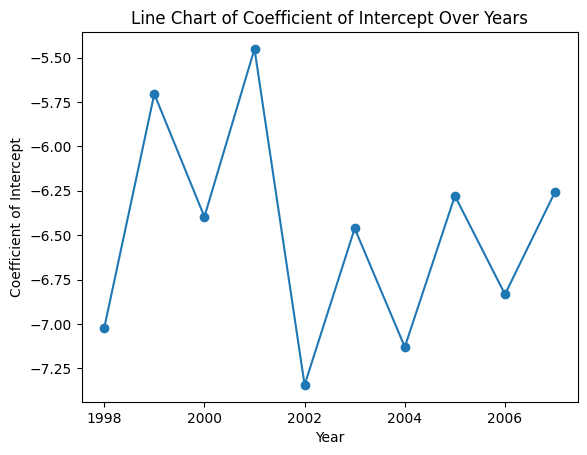

In [39]:
years = list(coeff_dict['const'].keys())
values = list(coeff_dict['const'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Intercept')
plt.title('Line Chart of Coefficient of Intercept Over Years')
plt.show()

### Month

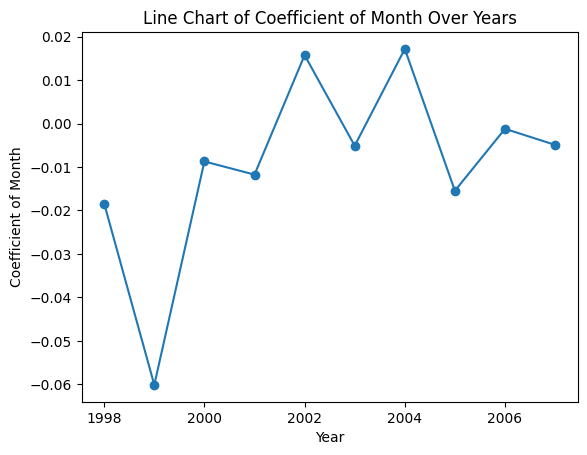

In [40]:
years = list(coeff_dict['Month'].keys())
values = list(coeff_dict['Month'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Month')
plt.title('Line Chart of Coefficient of Month Over Years')
plt.show()

### Week of Month

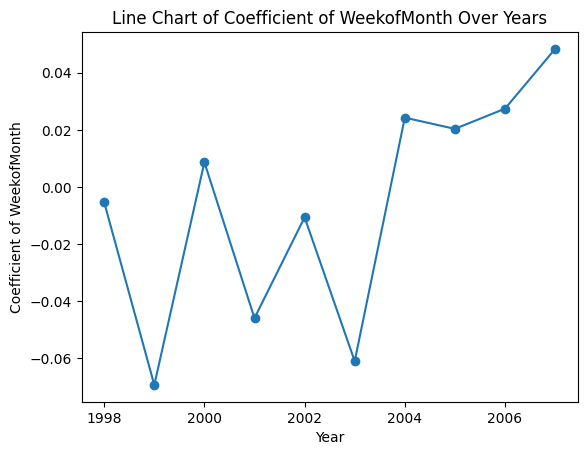

In [41]:
years = list(coeff_dict['WeekofMonth'].keys())
values = list(coeff_dict['WeekofMonth'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of WeekofMonth')
plt.title('Line Chart of Coefficient of WeekofMonth Over Years')
plt.show()

### Day of Week

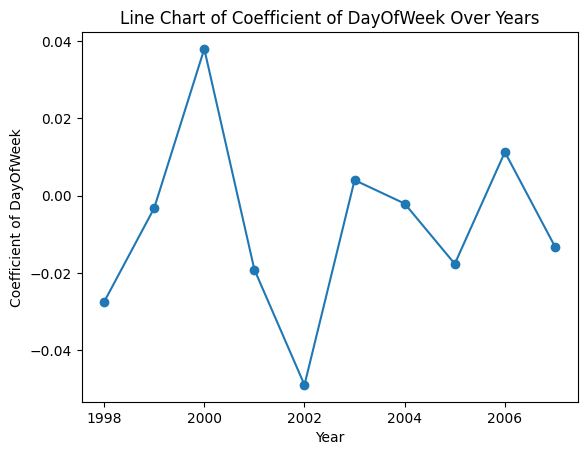

In [42]:
years = list(coeff_dict['DayOfWeek'].keys())
values = list(coeff_dict['DayOfWeek'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of DayOfWeek')
plt.title('Line Chart of Coefficient of DayOfWeek Over Years')
plt.show()

### CRSDepHour

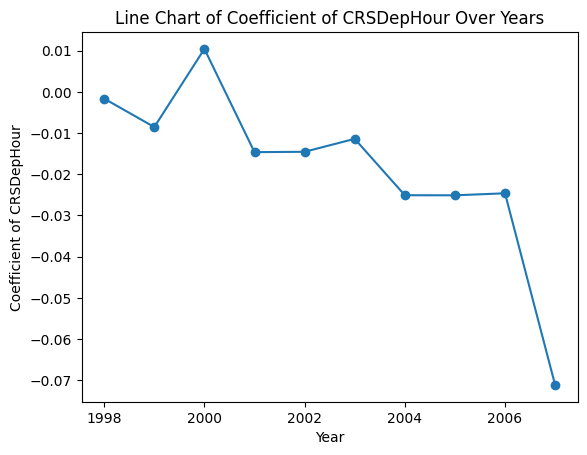

In [43]:
years = list(coeff_dict['CRSDepHour'].keys())
values = list(coeff_dict['CRSDepHour'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of CRSDepHour')
plt.title('Line Chart of Coefficient of CRSDepHour Over Years')
plt.show()

### CRSArrHour

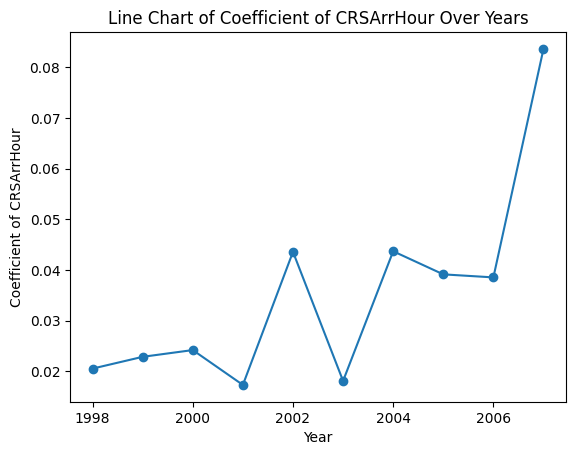

In [44]:
years = list(coeff_dict['CRSArrHour'].keys())
values = list(coeff_dict['CRSArrHour'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of CRSArrHour')
plt.title('Line Chart of Coefficient of CRSArrHour Over Years')
plt.show()

### Distance

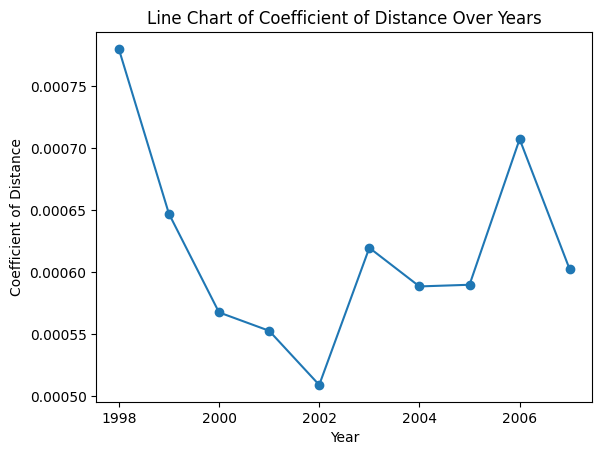

In [45]:
years = list(coeff_dict['Distance'].keys())
values = list(coeff_dict['Distance'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Distance')
plt.title('Line Chart of Coefficient of Distance Over Years')
plt.show()

### Origin Latitude

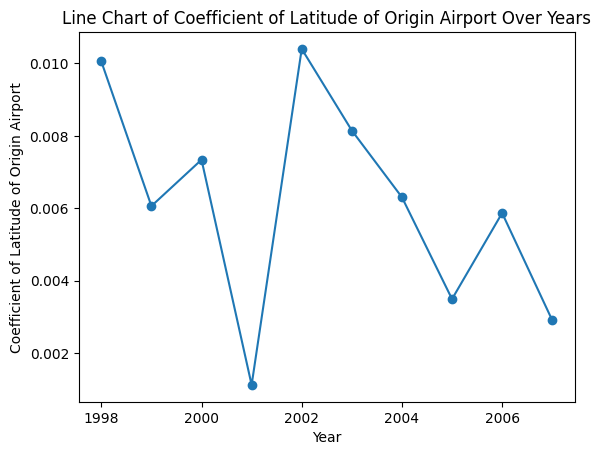

In [46]:
years = list(coeff_dict['origin lat'].keys())
values = list(coeff_dict['origin lat'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Latitude of Origin Airport')
plt.title('Line Chart of Coefficient of Latitude of Origin Airport Over Years')
plt.show()

### Longitude of Origin

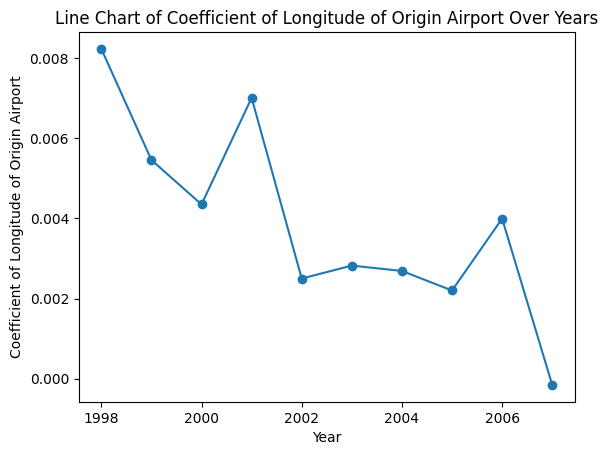

In [47]:
years = list(coeff_dict['origin long'].keys())
values = list(coeff_dict['origin long'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Longitude of Origin Airport')
plt.title('Line Chart of Coefficient of Longitude of Origin Airport Over Years')
plt.show()

### Latitude of Destination

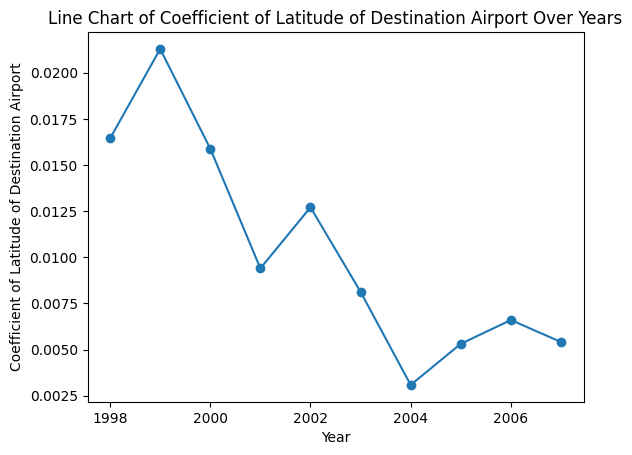

In [48]:
years = list(coeff_dict['dest lat'].keys())
values = list(coeff_dict['dest lat'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Latitude of Destination Airport')
plt.title('Line Chart of Coefficient of Latitude of Destination Airport Over Years')
plt.show()

### Longitude of Destination

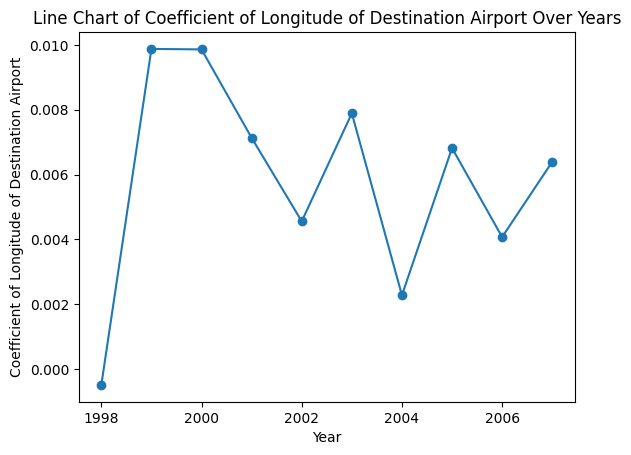

In [49]:
years = list(coeff_dict['dest long'].keys())
values = list(coeff_dict['dest long'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of Longitude of Destination Airport')
plt.title('Line Chart of Coefficient of Longitude of Destination Airport Over Years')
plt.show()

### UniqueCarrier_AS

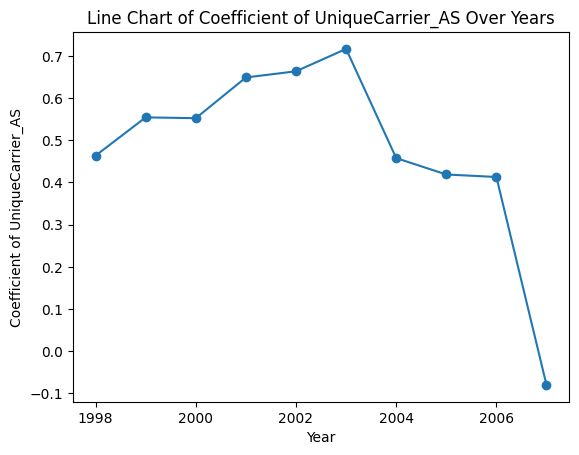

In [50]:
years = list(coeff_dict['UniqueCarrier_AS'].keys())
values = list(coeff_dict['UniqueCarrier_AS'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_AS')
plt.title('Line Chart of Coefficient of UniqueCarrier_AS Over Years')
plt.show()

### UniqueCarrier_CO

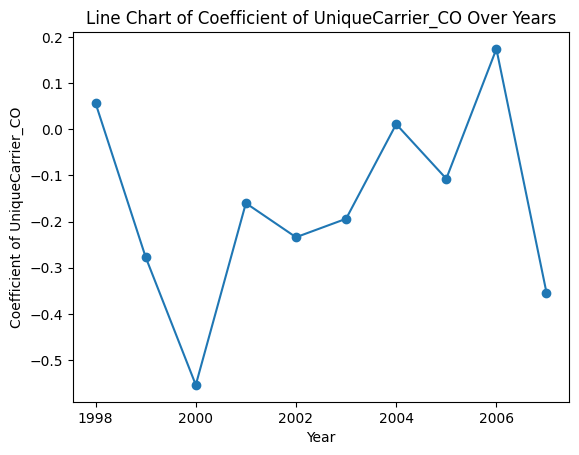

In [51]:
years = list(coeff_dict['UniqueCarrier_CO'].keys())
values = list(coeff_dict['UniqueCarrier_CO'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_CO')
plt.title('Line Chart of Coefficient of UniqueCarrier_CO Over Years')
plt.show()

### UniqueCarrier_DL

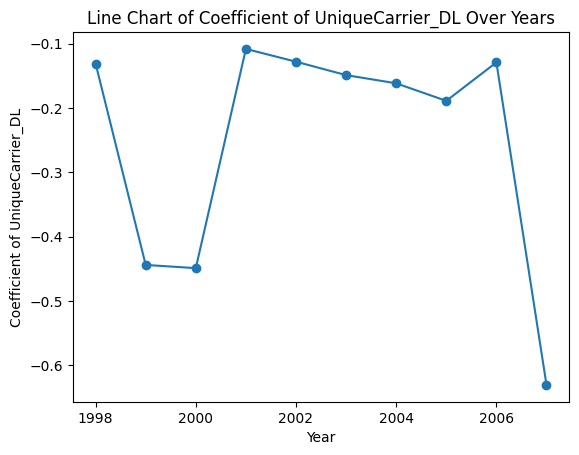

In [52]:
years = list(coeff_dict['UniqueCarrier_DL'].keys())
values = list(coeff_dict['UniqueCarrier_DL'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_DL')
plt.title('Line Chart of Coefficient of UniqueCarrier_DL Over Years')
plt.show()

### UniqueCarrier_HP

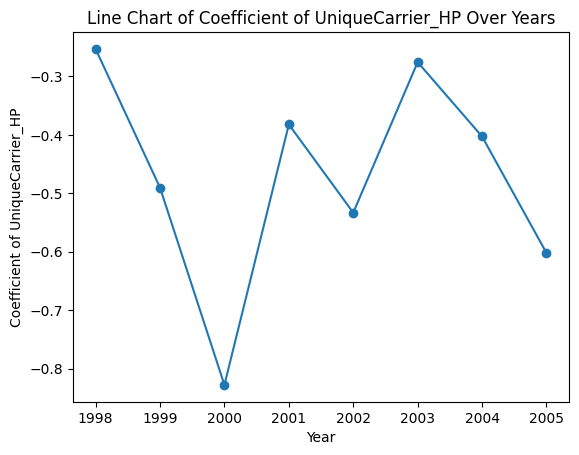

In [53]:
years = list(coeff_dict['UniqueCarrier_HP'].keys())
values = list(coeff_dict['UniqueCarrier_HP'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_HP')
plt.title('Line Chart of Coefficient of UniqueCarrier_HP Over Years')
plt.show()

### UniqueCarrier_NW

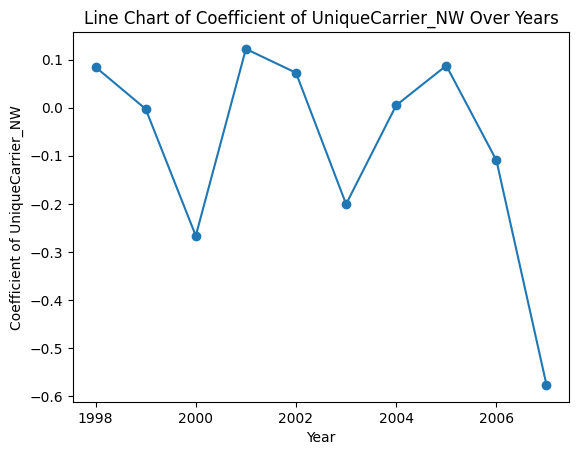

In [54]:
years = list(coeff_dict['UniqueCarrier_NW'].keys())
values = list(coeff_dict['UniqueCarrier_NW'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_NW')
plt.title('Line Chart of Coefficient of UniqueCarrier_NW Over Years')
plt.show()

### UniqueCarrier_TW

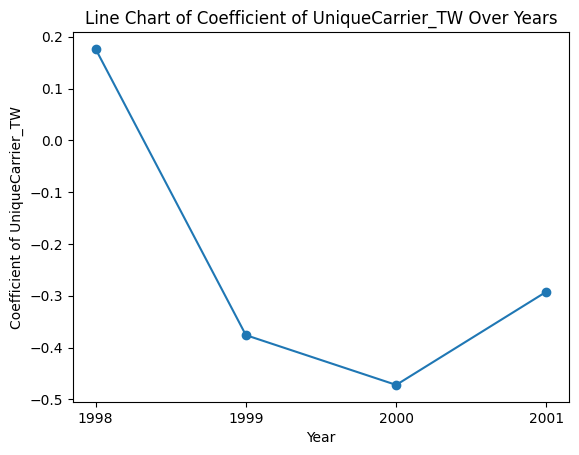

In [55]:
years = list(map(int, coeff_dict['UniqueCarrier_TW'].keys()))
values = list(coeff_dict['UniqueCarrier_TW'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_TW')
plt.title('Line Chart of Coefficient of UniqueCarrier_TW Over Years')

plt.xticks(years)

plt.show()


### UniqueCarrier_UA

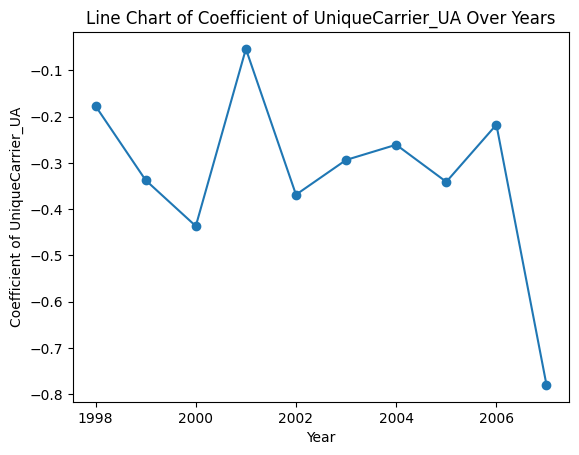

In [56]:
years = list(coeff_dict['UniqueCarrier_UA'].keys())
values = list(coeff_dict['UniqueCarrier_UA'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_UA')
plt.title('Line Chart of Coefficient of UniqueCarrier_UA Over Years')
plt.show()

### UniqueCarrier_US

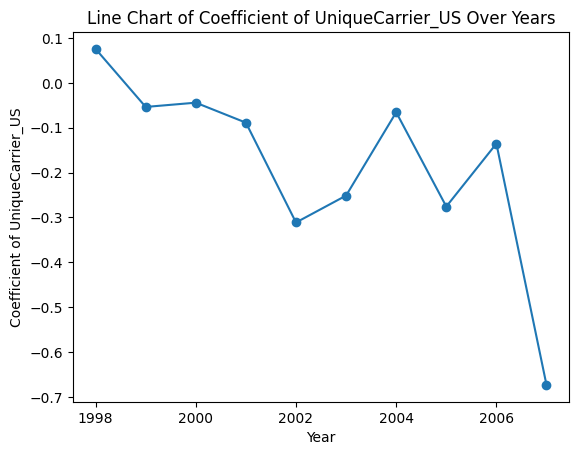

In [57]:
years = list(coeff_dict['UniqueCarrier_US'].keys())
values = list(coeff_dict['UniqueCarrier_US'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_US')
plt.title('Line Chart of Coefficient of UniqueCarrier_US Over Years')
plt.show()

### UniqueCarrier_WN

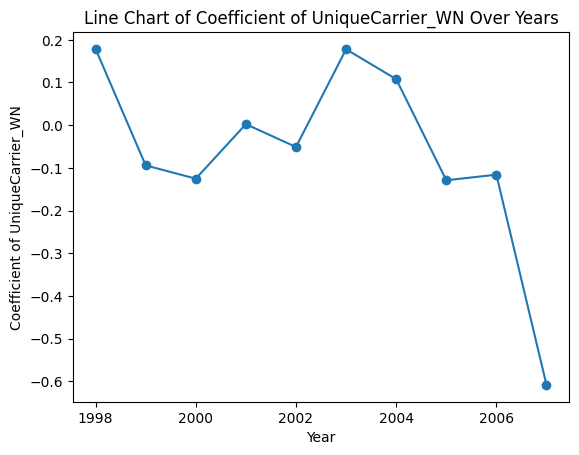

In [58]:
years = list(coeff_dict['UniqueCarrier_WN'].keys())
values = list(coeff_dict['UniqueCarrier_WN'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_WN')
plt.title('Line Chart of Coefficient of UniqueCarrier_WN Over Years')
plt.show()

### UniqueCarrier_AQ

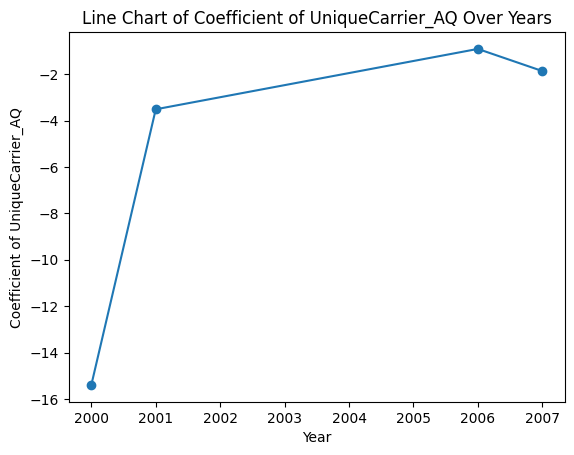

In [59]:
years = list(coeff_dict['UniqueCarrier_AQ'].keys())
values = list(coeff_dict['UniqueCarrier_AQ'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_AQ')
plt.title('Line Chart of Coefficient of UniqueCarrier_AQ Over Years')
plt.show()

### UniqueCarrier_MQ

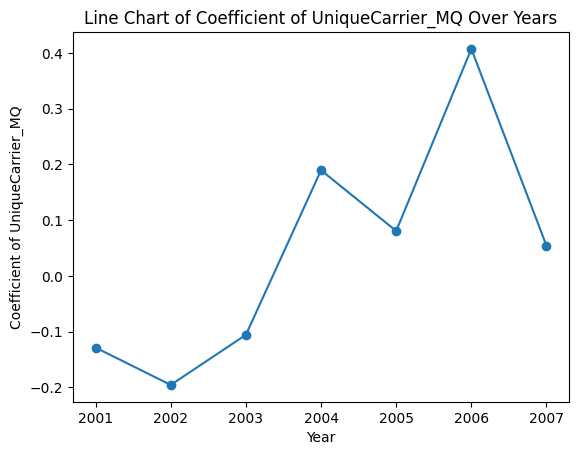

In [60]:
years = list(coeff_dict['UniqueCarrier_MQ'].keys())
values = list(coeff_dict['UniqueCarrier_MQ'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_MQ')
plt.title('Line Chart of Coefficient of UniqueCarrier_MQ Over Years')
plt.show()

### UniqueCarrier_B6

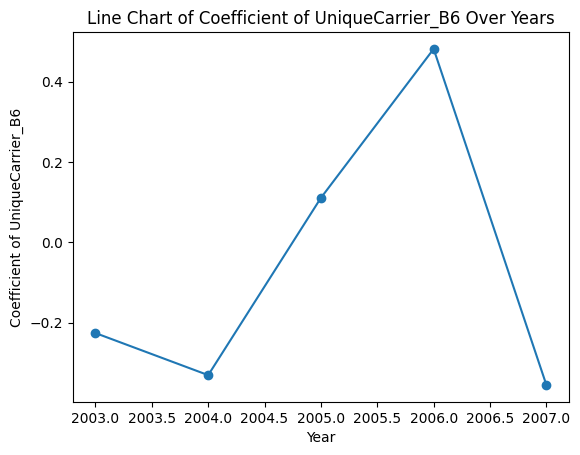

In [61]:
years = list(coeff_dict['UniqueCarrier_B6'].keys())
values = list(coeff_dict['UniqueCarrier_B6'].values())

plt.plot(years, values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_B6')
plt.title('Line Chart of Coefficient of UniqueCarrier_B6 Over Years')
plt.show()

### UniqueCarrier_DH

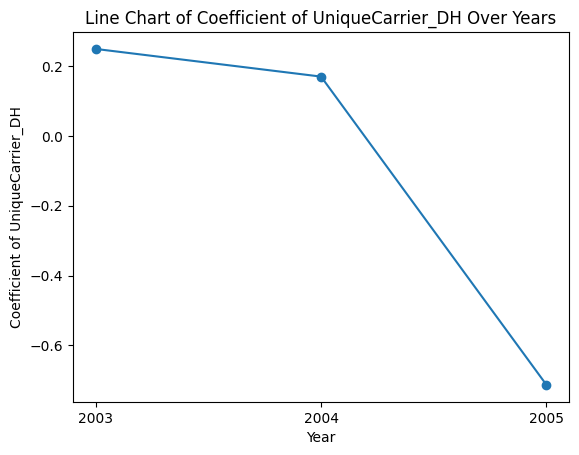

In [62]:
years = list(coeff_dict['UniqueCarrier_DH'].keys())
values = list(coeff_dict['UniqueCarrier_DH'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_DH')
plt.title('Line Chart of Coefficient of UniqueCarrier_DH Over Years')
plt.show()

### UniqueCarrier_EV

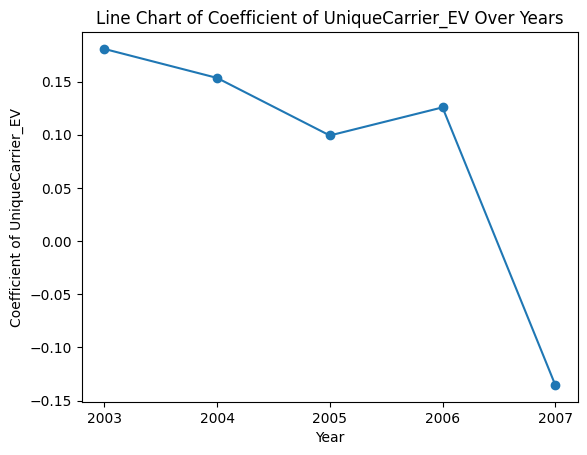

In [63]:
years = list(coeff_dict['UniqueCarrier_EV'].keys())
values = list(coeff_dict['UniqueCarrier_EV'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_EV')
plt.title('Line Chart of Coefficient of UniqueCarrier_EV Over Years')
plt.show()

### UniqueCarrier_FL

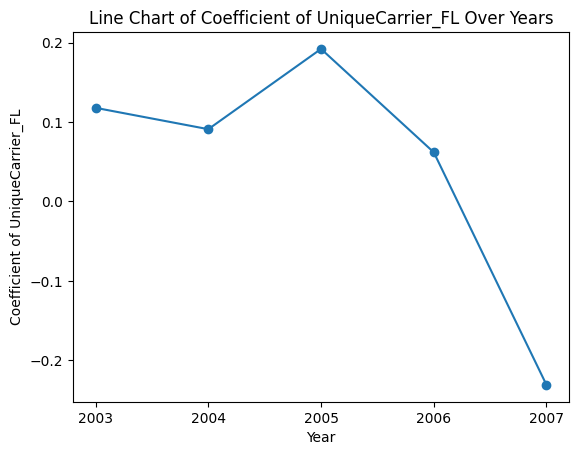

In [64]:
years = list(coeff_dict['UniqueCarrier_FL'].keys())
values = list(coeff_dict['UniqueCarrier_FL'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_FL')
plt.title('Line Chart of Coefficient of UniqueCarrier_FL Over Years')
plt.show()

### UniqueCarrier_HA

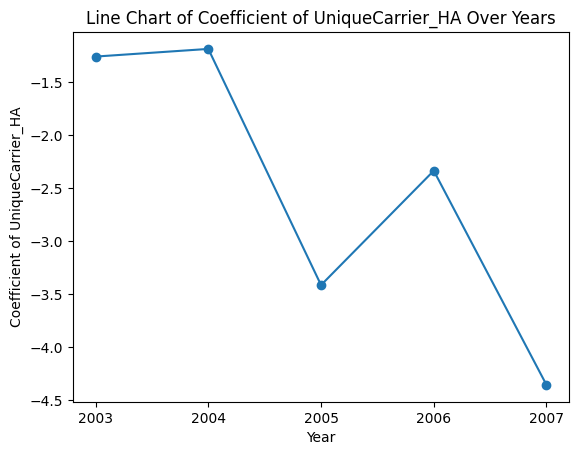

In [65]:
years = list(coeff_dict['UniqueCarrier_HA'].keys())
values = list(coeff_dict['UniqueCarrier_HA'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_HA')
plt.title('Line Chart of Coefficient of UniqueCarrier_HA Over Years')
plt.show()

### UniqueCarrier_OO

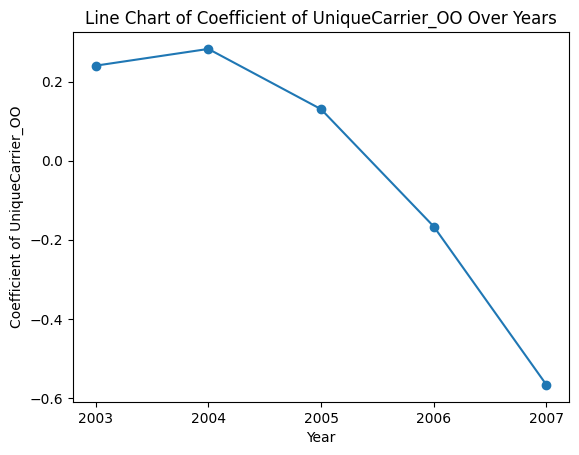

In [66]:
years = list(coeff_dict['UniqueCarrier_OO'].keys())
values = list(coeff_dict['UniqueCarrier_OO'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_OO')
plt.title('Line Chart of Coefficient of UniqueCarrier_OO Over Years')
plt.show()

### UniqueCarrier_TZ

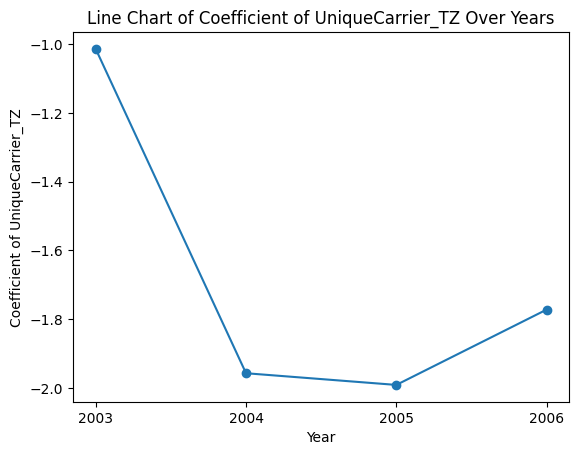

In [67]:
years = list(coeff_dict['UniqueCarrier_TZ'].keys())
values = list(coeff_dict['UniqueCarrier_TZ'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_TZ')
plt.title('Line Chart of Coefficient of UniqueCarrier_TZ Over Years')
plt.show()

### UniqueCarrier_XE

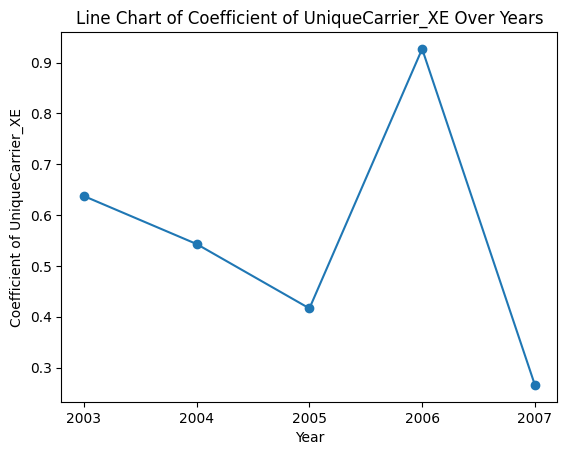

In [68]:
years = list(coeff_dict['UniqueCarrier_XE'].keys())
values = list(coeff_dict['UniqueCarrier_XE'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_XE')
plt.title('Line Chart of Coefficient of UniqueCarrier_XE Over Years')
plt.show()

### UniqueCarrier_OH

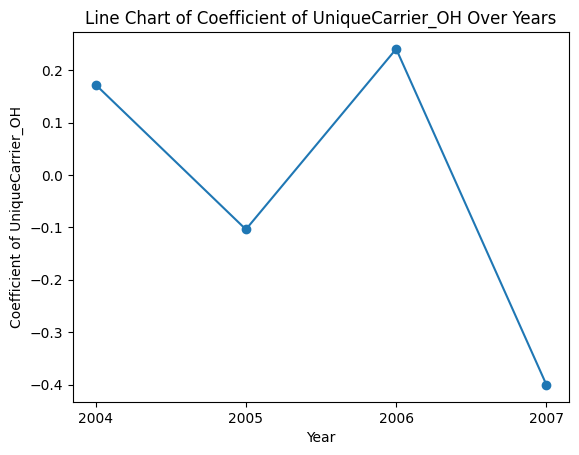

In [69]:
years = list(coeff_dict['UniqueCarrier_OH'].keys())
values = list(coeff_dict['UniqueCarrier_OH'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_OH')
plt.title('Line Chart of Coefficient of UniqueCarrier_OH Over Years')
plt.show()

### UniqueCarrier_F9

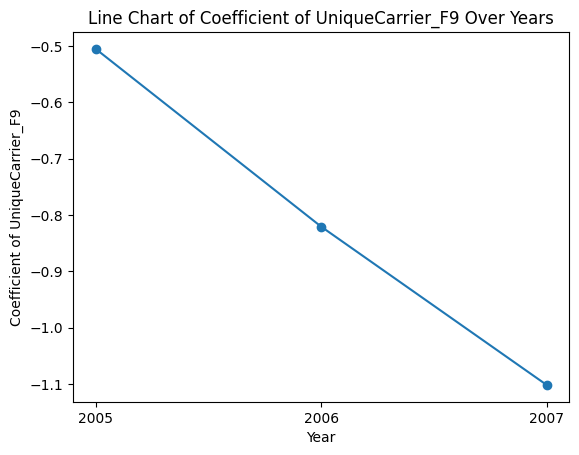

In [70]:
years = list(coeff_dict['UniqueCarrier_F9'].keys())
values = list(coeff_dict['UniqueCarrier_F9'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_F9')
plt.title('Line Chart of Coefficient of UniqueCarrier_F9 Over Years')
plt.show()

### UniqueCarrier_YV

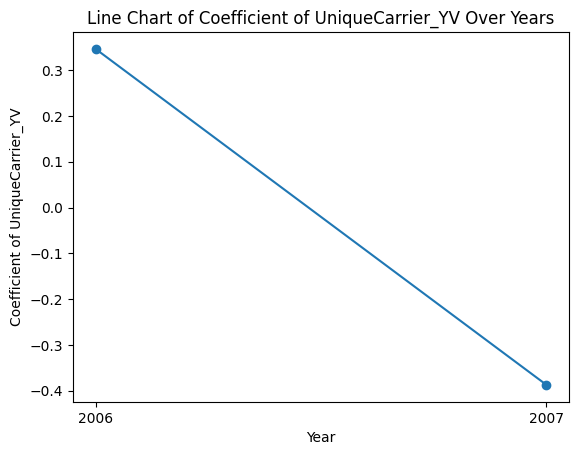

In [71]:
years = list(coeff_dict['UniqueCarrier_YV'].keys())
values = list(coeff_dict['UniqueCarrier_YV'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_YV')
plt.title('Line Chart of Coefficient of UniqueCarrier_YV Over Years')
plt.show()

### UniqueCarrier_AA

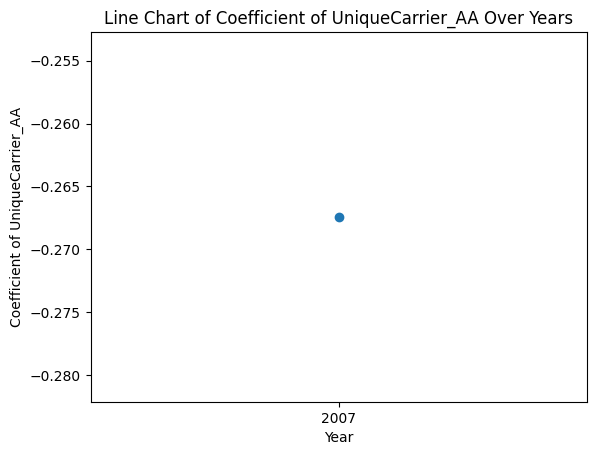

In [72]:
years = list(coeff_dict['UniqueCarrier_AA'].keys())
values = list(coeff_dict['UniqueCarrier_AA'].values())

plt.plot(years, values, marker='o', linestyle='-')
plt.xticks(years)

plt.xlabel('Year')
plt.ylabel('Coefficient of UniqueCarrier_AA')
plt.title('Line Chart of Coefficient of UniqueCarrier_AA Over Years')
plt.show()